# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator 
to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% 
annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one,
customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.


To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In [185]:
# Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the data

In [186]:
# Reading the dataset
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,...,0,1.00,1.00,1.00,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,...,0,NaN,1.00,1.00,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,...,0,NaN,NaN,NaN,1.00,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.34,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.64,...,0,0.00,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00


In [187]:
telecom.shape

(99999, 226)

In [188]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [189]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.00,99999.00,98981.00,98981.00,98981.00,99999.00,99999.00,99999.00,99999.00,96062.00,...,99999.00,25153.00,25571.00,26339.00,25922.00,99999.00,99999.00,99999.00,99999.00,99999.00
mean,7001207270.39,109.00,0.00,0.00,0.00,282.99,278.54,279.15,261.65,132.40,...,0.08,0.91,0.91,0.89,0.86,1219.85,68.17,66.84,60.02,3.30
std,695669.39,0.00,0.00,0.00,0.00,328.44,338.16,344.47,342.00,297.21,...,0.65,0.28,0.29,0.31,0.35,954.73,267.58,271.20,253.94,32.41
min,7000000074.00,109.00,0.00,0.00,0.00,-2258.71,-2014.05,-945.81,-1899.51,0.00,...,0.00,0.00,0.00,0.00,0.00,180.00,0.00,0.00,0.00,0.00
25%,7000606232.50,109.00,0.00,0.00,0.00,93.41,86.98,84.13,62.69,7.38,...,0.00,1.00,1.00,1.00,1.00,467.00,0.00,0.00,0.00,0.00
50%,7001204632.00,109.00,0.00,0.00,0.00,197.70,191.64,192.08,176.85,34.31,...,0.00,1.00,1.00,1.00,1.00,863.00,0.00,0.00,0.00,0.00
75%,7001812030.50,109.00,0.00,0.00,0.00,371.06,365.34,369.37,353.47,118.74,...,0.00,1.00,1.00,1.00,1.00,1807.50,0.00,0.00,0.00,0.00
max,7002410905.00,109.00,0.00,0.00,0.00,27731.09,35145.83,33543.62,38805.62,7376.71,...,49.00,1.00,1.00,1.00,1.00,4337.00,12916.22,9165.60,11166.21,2618.57


In [190]:
# Creating a copy of this origial variable in case if needed later on
orig_telecom = telecom.copy()
print(orig_telecom.shape)
print(telecom.shape)

(99999, 226)
(99999, 226)


## Filter High Value Customers

In [191]:
# Those who have recharged with an amount more than or equal to X, 
# where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

telecom['total_rech_data_amt_6'] = telecom['av_rech_amt_data_6'] * telecom['total_rech_data_6']
telecom['total_rech_data_amt_7'] = telecom['av_rech_amt_data_7'] * telecom['total_rech_data_7']
telecom['total_rech_data_amt_8'] = telecom['av_rech_amt_data_8'] * telecom['total_rech_data_8']
telecom['total_rech_data_amt_9'] = telecom['av_rech_amt_data_9'] * telecom['total_rech_data_9']

## total amount spend will be the sum of total data recharge done and total call/sms recharges.
telecom_av_rech_6n7 = (telecom['total_rech_amt_6'].fillna(0) 
+ telecom['total_rech_amt_7'].fillna(0) 
+ telecom['total_rech_data_amt_6'].fillna(0) 
+ telecom['total_rech_data_amt_7'].fillna(0))/2

# 70 percentile of the calculated average amount
percentile_70_6n7 = np.percentile(telecom_av_rech_6n7, 70.0)
print("70 percentile of 6n7 months is : ", percentile_70_6n7)

# filter the given data set based on 70th percentile
telecom_high_val_cust = telecom[telecom_av_rech_6n7 >= percentile_70_6n7]

print("Dimensions of the filtered dataset:", telecom_high_val_cust.shape)

70 percentile of 6n7 months is :  478.0
Dimensions of the filtered dataset: (30001, 230)


Derive churn based on churn phase (9th month)

In [192]:
# We will calculate churn/non churn based on the usage w.r.to below cols especially from 9th month .
telecom_high_val_cust['churn'] = np.where(telecom_high_val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1, 0)
telecom_high_val_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,churn
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,...,968,30.40,0.00,101.20,3.58,252.00,252.00,252.00,NaN,1
7,7000701601,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.18,...,802,57.74,19.38,18.74,0.00,NaN,NaN,NaN,NaN,1
8,7001524846,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.72,...,315,21.03,910.65,122.16,0.00,NaN,354.00,207.00,NaN,0
21,7002124215,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.45,...,720,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0
23,7000887461,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.35,...,604,40.45,51.86,0.00,0.00,NaN,712.00,540.00,252.00,0


In [193]:
# Creating a copy of this origial variable in case if needed later on
telecom_high_val_cust_copy = telecom_high_val_cust.copy()
print(telecom_high_val_cust_copy.shape)
print(telecom_high_val_cust.shape)

(30001, 231)
(30001, 231)


We can see that, we have around 30k rows after filtering.

In [194]:
# lets find out churn/non churn percentage
telecom_high_val_cust['churn'].value_counts(normalize=True)

0   0.92
1   0.08
Name: churn, dtype: float64

Around 91% customers do not churn, this might be due to class imbalance issue. We will treat it later.

In [195]:
# Checking churn percentage
round(100*(telecom_high_val_cust['churn'].mean()),2)

8.14

## Data Cleaning

In [196]:
# Finding out columns with missing values fraction in the data set (null values fraction in each column)
tmp = telecom_high_val_cust.isnull().mean().reset_index()
tmp = tmp.rename(columns={"index":"Column Name", 0:"Missing value fraction"})
tmp = tmp.sort_values(by="Missing value fraction", ascending=False)
tmp.head(50)

,Column Name,Missing value fraction
172,count_rech_2g_9,0.49
196,arpu_2g_9,0.49
200,night_pck_user_9,0.49
164,total_rech_data_9,0.49
160,date_of_last_rech_data_9,0.49
180,av_rech_amt_data_9,0.49
220,fb_user_9,0.49
168,max_rech_data_9,0.49
229,total_rech_data_amt_9,0.49
192,arpu_3g_9,0.49


In [197]:
## Function for dropping columns whose having more than 30% null values except 9th Month's columns
def dropCols(tmp):
    drop_cols_list=list(tmp[(tmp["Column Name"].str.contains('_9')==False) & (tmp['Missing value fraction'] > 0.3)]['Column Name'])
    print (drop_cols_list)
    print (len(drop_cols_list))
    df1 = telecom_high_val_cust.drop(drop_cols_list, axis=1)
    return df1

telecom_high_val_cust = dropCols(tmp)

['arpu_2g_8', 'total_rech_data_amt_8', 'arpu_3g_8', 'count_rech_3g_8', 'count_rech_2g_8', 'fb_user_8', 'night_pck_user_8', 'max_rech_data_8', 'av_rech_amt_data_8', 'date_of_last_rech_data_8', 'total_rech_data_8', 'total_rech_data_6', 'count_rech_3g_6', 'count_rech_2g_6', 'fb_user_6', 'date_of_last_rech_data_6', 'av_rech_amt_data_6', 'night_pck_user_6', 'total_rech_data_amt_6', 'arpu_2g_6', 'arpu_3g_6', 'max_rech_data_6', 'date_of_last_rech_data_7', 'fb_user_7', 'total_rech_data_7', 'arpu_3g_7', 'av_rech_amt_data_7', 'max_rech_data_7', 'arpu_2g_7', 'count_rech_2g_7', 'total_rech_data_amt_7', 'count_rech_3g_7', 'night_pck_user_7']
33


In [198]:
# shape of dataset after dropping columns whose having null values more than 30%
telecom_high_val_cust.shape

(30001, 198)

In [199]:
# After removing above 30% null values columns and data frame consists of remaining cols are as below 
tmp=telecom_high_val_cust.isnull().mean().reset_index()
tmp=tmp.rename(columns={"index":"Column Name", 0:"Missing value fraction"})
tmp = tmp.sort_values(by="Missing value fraction", ascending=False)
tmp.head(50)

,Column Name,Missing value fraction
190,fb_user_9,0.49
159,max_rech_data_9,0.49
173,night_pck_user_9,0.49
172,arpu_2g_9,0.49
157,date_of_last_rech_data_9,0.49
158,total_rech_data_9,0.49
171,arpu_3g_9,0.49
196,total_rech_data_amt_9,0.49
160,count_rech_2g_9,0.49
161,count_rech_3g_9,0.49


In [200]:
# Deleting all the columns corresponding to the churn phase (9th month)

# Now we will delete 9th month columns because we would predict churn/non-churn later based on data from the 1st 3 months
cols_to_drop = [col for col in telecom_high_val_cust.columns if '_9' in col]
print(cols_to_drop)

telecom_high_val_cust.drop(cols_to_drop, axis=1, inplace=True)

telecom_high_val_cust.shape

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_rech_data_amt_9']

(30001, 143)

## Imputing missing values

In [201]:
# lets check for columns that can be changed to integers, floats or date types
object_cols = telecom_high_val_cust.select_dtypes(include=['object'])
print(object_cols.iloc[0])

last_date_of_month_6    6/30/2014
last_date_of_month_7    7/31/2014
last_date_of_month_8    8/31/2014
date_of_last_rech_6     6/21/2014
date_of_last_rech_7     7/16/2014
date_of_last_rech_8      8/8/2014
Name: 0, dtype: object


In [202]:
# convert to datetime
for col in object_cols.columns:
    telecom_high_val_cust[col] = pd.to_datetime(telecom_high_val_cust[col])

In [203]:
#Remove columns which have only one unique value (zero variance)
telecom_high_val_cust = telecom_high_val_cust.loc[:, telecom_high_val_cust.nunique() != 1]
telecom_high_val_cust.shape

(30001, 130)

Handling missing values in rows

In [204]:
# Count the rows having more than 50% missing values
telecom_high_val_cust_missing_rows_50 = telecom_high_val_cust[(telecom_high_val_cust.isnull().sum(axis=1)) > (len(telecom_high_val_cust.columns)//2)]
telecom_high_val_cust_missing_rows_50.shape

(254, 130)

In [205]:
# Dropping the rows having more than 50% missing values
telecom_high_val_cust = telecom_high_val_cust.drop(telecom_high_val_cust_missing_rows_50.index)
telecom_high_val_cust.shape

(29747, 130)

In [206]:
# Again cheking percent of missing values in columns
telecom_high_val_cust_missing_columns = (round(((telecom_high_val_cust.isnull().sum()/len(telecom_high_val_cust.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
telecom_high_val_cust_missing_columns

,null
std_ic_t2t_mou_8,3.09
roam_og_mou_8,3.09
loc_og_t2c_mou_8,3.09
std_ic_mou_8,3.09
isd_og_mou_8,3.09
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
last_day_rch_amt_6,0.00
last_day_rch_amt_7,0.00


In [207]:
# Listing the columns of MOU for Aug (8th month)
print(((telecom_high_val_cust_missing_columns[telecom_high_val_cust_missing_columns['null'] == 3.09]).index).to_list())

['std_ic_t2t_mou_8', 'roam_og_mou_8', 'loc_og_t2c_mou_8', 'std_ic_mou_8', 'isd_og_mou_8', 'loc_og_t2f_mou_8', 'loc_ic_t2f_mou_8', 'spl_og_mou_8', 'loc_og_t2m_mou_8', 'std_og_mou_8', 'std_og_t2f_mou_8', 'loc_og_t2t_mou_8', 'spl_ic_mou_8', 'og_others_8', 'std_ic_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'roam_ic_mou_8', 'loc_ic_mou_8', 'offnet_mou_8', 'isd_ic_mou_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'ic_others_8']


In [208]:
# Creating a dataframe with the condition, in which MOU for Aug(8th month) are null
telecom_high_val_cust_null_mou_8 = telecom_high_val_cust[(telecom_high_val_cust['std_ic_t2t_mou_8'].isnull()) &
(telecom_high_val_cust['roam_og_mou_8'].isnull()) & (telecom_high_val_cust['loc_og_t2c_mou_8'].isnull()) &
(telecom_high_val_cust['std_ic_mou_8'].isnull()) & (telecom_high_val_cust['isd_og_mou_8'].isnull()) &
(telecom_high_val_cust['loc_og_t2f_mou_8'].isnull()) & (telecom_high_val_cust['loc_ic_t2f_mou_8'].isnull()) &
(telecom_high_val_cust['loc_og_t2m_mou_8'].isnull()) & (telecom_high_val_cust['std_og_mou_8'].isnull()) &
(telecom_high_val_cust['std_og_t2f_mou_8'].isnull()) & (telecom_high_val_cust['loc_og_t2t_mou_8'].isnull()) &
(telecom_high_val_cust['spl_ic_mou_8'].isnull()) & (telecom_high_val_cust['og_others_8'].isnull()) & 
(telecom_high_val_cust['std_ic_t2m_mou_8'].isnull()) & (telecom_high_val_cust['loc_og_mou_8'].isnull()) & 
(telecom_high_val_cust['std_og_t2t_mou_8'].isnull()) & (telecom_high_val_cust['roam_ic_mou_8'].isnull()) &  
(telecom_high_val_cust['loc_ic_mou_8'].isnull()) & (telecom_high_val_cust['offnet_mou_8'].isnull()) &
(telecom_high_val_cust['isd_ic_mou_8'].isnull()) & (telecom_high_val_cust['loc_ic_t2t_mou_8'].isnull()) &
(telecom_high_val_cust['onnet_mou_8'].isnull()) & (telecom_high_val_cust['std_ic_t2f_mou_8'].isnull()) &
(telecom_high_val_cust['std_og_t2m_mou_8'].isnull()) & (telecom_high_val_cust['loc_ic_t2m_mou_8'].isnull()) & 
(telecom_high_val_cust['ic_others_8'].isnull())]

In [209]:
# Deleting the records for which MOU for Aug(8th month) are null
telecom_high_val_cust = telecom_high_val_cust.drop(telecom_high_val_cust_null_mou_8.index)

In [210]:
# Again cheking percent of missing values in columns
telecom_high_val_cust_missing_columns = (round(((telecom_high_val_cust.isnull().sum()/len(telecom_high_val_cust.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
telecom_high_val_cust_missing_columns.head(50)

,null
date_of_last_rech_8,0.96
loc_ic_mou_6,0.82
loc_og_t2t_mou_6,0.82
std_og_mou_6,0.82
std_og_t2m_mou_6,0.82
isd_og_mou_6,0.82
std_og_t2t_mou_6,0.82
spl_og_mou_6,0.82
loc_og_mou_6,0.82
std_ic_t2f_mou_6,0.82


In [211]:
telecom_high_val_cust_null_rech_8 = telecom_high_val_cust[(telecom_high_val_cust['date_of_last_rech_8'].isnull())]

In [212]:
telecom_high_val_cust = telecom_high_val_cust.drop(telecom_high_val_cust_null_rech_8.index)

In [213]:
# Again Cheking percent of missing values in columns
telecom_high_val_cust_missing_columns = (round(((telecom_high_val_cust.isnull().sum()/len(telecom_high_val_cust.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
telecom_high_val_cust_missing_columns.head(50)

,null
loc_ic_mou_6,0.82
loc_og_t2t_mou_6,0.82
std_ic_mou_6,0.82
std_og_mou_6,0.82
std_og_t2m_mou_6,0.82
isd_og_mou_6,0.82
std_og_t2t_mou_6,0.82
loc_og_mou_6,0.82
spl_og_mou_6,0.82
loc_og_t2c_mou_6,0.82


In [214]:
# Listing the columns of MOU June(6)
print(((telecom_high_val_cust_missing_columns[telecom_high_val_cust_missing_columns['null'] == 0.82]).index).to_list())

['loc_ic_mou_6', 'loc_og_t2t_mou_6', 'std_ic_mou_6', 'std_og_mou_6', 'std_og_t2m_mou_6', 'isd_og_mou_6', 'std_og_t2t_mou_6', 'loc_og_mou_6', 'spl_og_mou_6', 'loc_og_t2c_mou_6', 'std_ic_t2f_mou_6', 'og_others_6', 'loc_og_t2f_mou_6', 'spl_ic_mou_6', 'std_ic_t2m_mou_6', 'loc_og_t2m_mou_6', 'loc_ic_t2t_mou_6', 'roam_ic_mou_6', 'ic_others_6', 'onnet_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'offnet_mou_6', 'loc_ic_t2m_mou_6', 'std_og_t2f_mou_6', 'isd_ic_mou_6', 'roam_og_mou_6']


In [215]:
# Creating a dataframe with the condition, in which MOU for June(6) are null
telecom_high_val_cust_null_mou_6 = telecom_high_val_cust[(telecom_high_val_cust['loc_ic_mou_6'].isnull()) &
(telecom_high_val_cust['loc_og_t2t_mou_6'].isnull()) & (telecom_high_val_cust['std_ic_mou_6'].isnull()) &
(telecom_high_val_cust['std_og_t2m_mou_6'].isnull()) & (telecom_high_val_cust['isd_og_mou_6'].isnull()) &
(telecom_high_val_cust['std_og_t2t_mou_6'].isnull()) & (telecom_high_val_cust['loc_og_mou_6'].isnull()) &
(telecom_high_val_cust['spl_og_mou_6'].isnull()) & (telecom_high_val_cust['loc_og_t2c_mou_6'].isnull()) &
(telecom_high_val_cust['std_ic_t2f_mou_6'].isnull()) & (telecom_high_val_cust['og_others_6'].isnull()) &
(telecom_high_val_cust['loc_og_t2f_mou_6'].isnull()) & (telecom_high_val_cust['spl_ic_mou_6'].isnull()) & 
(telecom_high_val_cust['std_ic_t2m_mou_6'].isnull()) & (telecom_high_val_cust['loc_og_t2m_mou_6'].isnull()) & 
(telecom_high_val_cust['loc_ic_t2t_mou_6'].isnull()) & (telecom_high_val_cust['roam_ic_mou_6'].isnull()) &  
(telecom_high_val_cust['ic_others_6'].isnull()) & (telecom_high_val_cust['onnet_mou_6'].isnull()) &
(telecom_high_val_cust['loc_ic_t2f_mou_6'].isnull()) & (telecom_high_val_cust['std_ic_t2t_mou_6'].isnull()) &
(telecom_high_val_cust['offnet_mou_6'].isnull()) & (telecom_high_val_cust['loc_ic_t2m_mou_6'].isnull()) &
(telecom_high_val_cust['std_og_t2f_mou_6'].isnull()) & (telecom_high_val_cust['isd_ic_mou_6'].isnull()) & 
(telecom_high_val_cust['roam_og_mou_6'].isnull())]

In [216]:
# Deleting the records for which MOU for June(6) are null
telecom_high_val_cust = telecom_high_val_cust.drop(telecom_high_val_cust_null_mou_6.index)

In [217]:
# Again cheking percent of missing values in columns
telecom_high_val_cust_missing_columns = (round(((telecom_high_val_cust.isnull().sum()/len(telecom_high_val_cust.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
telecom_high_val_cust_missing_columns.head(50)

,null
loc_ic_mou_7,0.31
loc_og_t2m_mou_7,0.31
loc_og_t2c_mou_7,0.31
loc_og_mou_7,0.31
std_og_t2t_mou_7,0.31
std_og_t2m_mou_7,0.31
std_og_mou_7,0.31
isd_og_mou_7,0.31
spl_og_mou_7,0.31
og_others_7,0.31


In [218]:
telecom_high_val_cust_null_rech_6 = telecom_high_val_cust[(telecom_high_val_cust['date_of_last_rech_6'].isnull())]

In [219]:
# Deleting the records for which RECH for June(6th month) is null
telecom_high_val_cust = telecom_high_val_cust.drop(telecom_high_val_cust_null_rech_6.index)

In [220]:
# Again cheking percent of missing values in columns
telecom_high_val_cust_missing_columns = (round(((telecom_high_val_cust.isnull().sum()/len(telecom_high_val_cust.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
telecom_high_val_cust_missing_columns.head(50)

,null
loc_ic_mou_7,0.31
loc_og_t2m_mou_7,0.31
loc_og_t2c_mou_7,0.31
loc_og_mou_7,0.31
std_og_t2t_mou_7,0.31
std_og_t2m_mou_7,0.31
std_og_mou_7,0.31
isd_og_mou_7,0.31
spl_og_mou_7,0.31
og_others_7,0.31


In [221]:
# Listing the columns of MOU July(7th month)
print(((telecom_high_val_cust_missing_columns[telecom_high_val_cust_missing_columns['null'] == 0.31]).index).to_list())

['loc_ic_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'loc_ic_t2t_mou_7', 'ic_others_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'isd_ic_mou_7', 'spl_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'loc_og_t2f_mou_7', 'std_og_t2f_mou_7', 'std_ic_mou_7', 'loc_og_t2t_mou_7', 'roam_og_mou_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7']


In [222]:
# Creating a dataframe with the condition, in which MOU for July(7th month) are null
telecom_high_val_cust_null_mou_7 = telecom_high_val_cust[(telecom_high_val_cust['loc_ic_mou_7'].isnull()) &
(telecom_high_val_cust['loc_og_t2m_mou_7'].isnull()) & (telecom_high_val_cust['loc_og_t2c_mou_7'].isnull()) &
(telecom_high_val_cust['loc_og_mou_7'].isnull()) & (telecom_high_val_cust['std_og_t2t_mou_7'].isnull()) &
(telecom_high_val_cust['std_og_t2m_mou_7'].isnull()) & (telecom_high_val_cust['std_og_mou_7'].isnull()) &
(telecom_high_val_cust['spl_og_mou_7'].isnull()) & (telecom_high_val_cust['og_others_7'].isnull()) &
(telecom_high_val_cust['loc_ic_t2t_mou_7'].isnull()) & (telecom_high_val_cust['ic_others_7'].isnull()) &
(telecom_high_val_cust['loc_ic_t2m_mou_7'].isnull()) & (telecom_high_val_cust['loc_ic_t2f_mou_7'].isnull()) & 
(telecom_high_val_cust['isd_ic_mou_7'].isnull()) & (telecom_high_val_cust['spl_ic_mou_7'].isnull()) & 
(telecom_high_val_cust['std_ic_t2t_mou_7'].isnull()) & (telecom_high_val_cust['std_ic_t2m_mou_7'].isnull()) &  
(telecom_high_val_cust['std_ic_t2f_mou_7'].isnull()) & (telecom_high_val_cust['loc_og_t2f_mou_7'].isnull()) &
(telecom_high_val_cust['std_og_t2f_mou_7'].isnull()) & (telecom_high_val_cust['std_ic_mou_7'].isnull()) &
(telecom_high_val_cust['loc_og_t2t_mou_7'].isnull()) & (telecom_high_val_cust['roam_og_mou_7'].isnull()) &
(telecom_high_val_cust['offnet_mou_7'].isnull()) & (telecom_high_val_cust['onnet_mou_7'].isnull()) & 
(telecom_high_val_cust['roam_ic_mou_7'].isnull())]

In [223]:
# Deleting the records for which MOU for July(7th month) are null
telecom_high_val_cust = telecom_high_val_cust.drop(telecom_high_val_cust_null_mou_7.index)

In [224]:
# Again cheking percent of missing values in columns
telecom_high_val_cust_missing_columns = (round(((telecom_high_val_cust.isnull().sum()/len(telecom_high_val_cust.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
telecom_high_val_cust_missing_columns.head()

,null
date_of_last_rech_7,0.14
mobile_number,0.00
spl_ic_mou_6,0.00
total_rech_amt_7,0.00
total_rech_amt_6,0.00


In [225]:
telecom_high_val_cust_null_rech_7 = telecom_high_val_cust[(telecom_high_val_cust['date_of_last_rech_7'].isnull())]

In [226]:
# Deleting the records for which RECH for July(7) is null
telecom_high_val_cust = telecom_high_val_cust.drop(telecom_high_val_cust_null_rech_7.index)

In [227]:
# Again cheking percent of missing values in columns
telecom_high_val_cust_missing_columns = (round(((telecom_high_val_cust.isnull().sum()/len(telecom_high_val_cust.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
telecom_high_val_cust_missing_columns.head(50)

,null
mobile_number,0.00
max_rech_amt_6,0.00
total_rech_amt_7,0.00
total_rech_amt_6,0.00
total_rech_num_8,0.00
total_rech_num_7,0.00
total_rech_num_6,0.00
ic_others_8,0.00
ic_others_7,0.00
ic_others_6,0.00


We can see there are no more missing values in any columns.

In [228]:
telecom_high_val_cust.shape

(28163, 130)

In [229]:
telecom_high_val_cust.dtypes.head(50)

mobile_number         int64
arpu_6              float64
arpu_7              float64
arpu_8              float64
onnet_mou_6         float64
onnet_mou_7         float64
onnet_mou_8         float64
offnet_mou_6        float64
offnet_mou_7        float64
offnet_mou_8        float64
roam_ic_mou_6       float64
roam_ic_mou_7       float64
roam_ic_mou_8       float64
roam_og_mou_6       float64
roam_og_mou_7       float64
roam_og_mou_8       float64
loc_og_t2t_mou_6    float64
loc_og_t2t_mou_7    float64
loc_og_t2t_mou_8    float64
loc_og_t2m_mou_6    float64
loc_og_t2m_mou_7    float64
loc_og_t2m_mou_8    float64
loc_og_t2f_mou_6    float64
loc_og_t2f_mou_7    float64
loc_og_t2f_mou_8    float64
loc_og_t2c_mou_6    float64
loc_og_t2c_mou_7    float64
loc_og_t2c_mou_8    float64
loc_og_mou_6        float64
loc_og_mou_7        float64
loc_og_mou_8        float64
std_og_t2t_mou_6    float64
std_og_t2t_mou_7    float64
std_og_t2t_mou_8    float64
std_og_t2m_mou_6    float64
std_og_t2m_mou_7    

In [230]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(telecom_high_val_cust.index)/30001)),2)

0.06

We can see that we have lost almost 6% records. But we have enough number of records to do our analysis.

# Derive new features

In [231]:
col_list = telecom_high_val_cust.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou',
       'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou',
       'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'date_of_last_rech',
       'last_day_rch_amt', 'vol_2g_mb', 'vol_3g_mb', 'monthly_2g', 'sachet_2g',
       'monthly_3g', 'sachet_3g'],
      dtype='object')

In [232]:
# create a new colulmn, which would be average of 6th & 7th months
# lets first create list of columns belonging to 6th and 7th months
col_list = telecom_high_val_cust.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()
print(telecom_high_val_cust.shape)
# lets take the average now
for idx, col in enumerate(col_list.unique()):
    if 'date_of_last_rech' not in col:
        avg_col_name = "avg_"+col+"_av67" # lets create the column name dynamically
        col_6 = col+"_6"
        col_7 = col+"_7"
        telecom_high_val_cust[avg_col_name] = (telecom_high_val_cust[col_6]  + telecom_high_val_cust[col_7])/ 2

(28163, 130)


In [233]:
# we dont need columns from which we have derived new features, we will drop those columns
print ("dimensions of the updated dataset after creating new dervied features:",telecom_high_val_cust.shape)
col_to_drop = telecom_high_val_cust.filter(regex='_6|_7').columns
telecom_high_val_cust.drop(col_to_drop, axis=1, inplace=True)

print("dimensions of the dataset after dropping above un-necessary columns:",telecom_high_val_cust.shape)

dimensions of the updated dataset after creating new dervied features: (28163, 170)
dimensions of the dataset after dropping above un-necessary columns: (28163, 88)


In [234]:
# lets now conevrt AON (Age Of Network) in months
telecom_high_val_cust['aon_mon'] = telecom_high_val_cust['aon']/30
telecom_high_val_cust.drop('aon', axis=1, inplace=True)
telecom_high_val_cust['aon_mon'].head()

7    26.73
8    10.50
21   24.00
23   20.13
33   44.27
Name: aon_mon, dtype: float64

In [235]:
tn_range = [0, 6, 12, 24, 60, 61] #tenure_range
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above'] # tenure_label
telecom_high_val_cust['tenure_range'] = pd.cut(telecom_high_val_cust['aon_mon'], tn_range, labels=tn_label)
telecom_high_val_cust['tenure_range'].head()

7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
33        2-5 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

In [236]:
telecom_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28163 entries, 7 to 99997
Data columns (total 89 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   mobile_number              28163 non-null  int64         
 1   arpu_8                     28163 non-null  float64       
 2   onnet_mou_8                28163 non-null  float64       
 3   offnet_mou_8               28163 non-null  float64       
 4   roam_ic_mou_8              28163 non-null  float64       
 5   roam_og_mou_8              28163 non-null  float64       
 6   loc_og_t2t_mou_8           28163 non-null  float64       
 7   loc_og_t2m_mou_8           28163 non-null  float64       
 8   loc_og_t2f_mou_8           28163 non-null  float64       
 9   loc_og_t2c_mou_8           28163 non-null  float64       
 10  loc_og_mou_8               28163 non-null  float64       
 11  std_og_t2t_mou_8           28163 non-null  float64       
 12  std_

In [237]:
# lets check the correlation amongst the features, drop the highly correlated ones
# Create correlation matrix
corr_matrix = telecom_high_val_cust.corr().abs()
#corr_matrix
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#upper
# Find index of feature columns with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

telecom_high_val_cust.drop(to_drop, axis=1, inplace=True)

In [238]:
telecom_high_val_cust.shape

(28163, 52)

# Data Visualisation

In [239]:
telecom_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28163 entries, 7 to 99997
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   mobile_number              28163 non-null  int64         
 1   arpu_8                     28163 non-null  float64       
 2   onnet_mou_8                28163 non-null  float64       
 3   offnet_mou_8               28163 non-null  float64       
 4   roam_ic_mou_8              28163 non-null  float64       
 5   roam_og_mou_8              28163 non-null  float64       
 6   loc_og_t2t_mou_8           28163 non-null  float64       
 7   loc_og_t2m_mou_8           28163 non-null  float64       
 8   loc_og_t2f_mou_8           28163 non-null  float64       
 9   loc_og_t2c_mou_8           28163 non-null  float64       
 10  std_og_t2f_mou_8           28163 non-null  float64       
 11  isd_og_mou_8               28163 non-null  float64       
 12  spl_

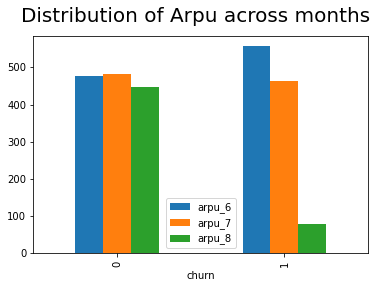

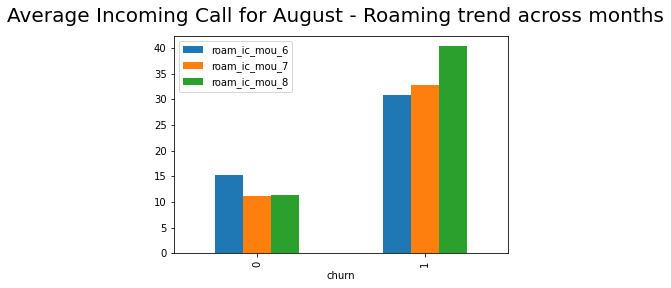

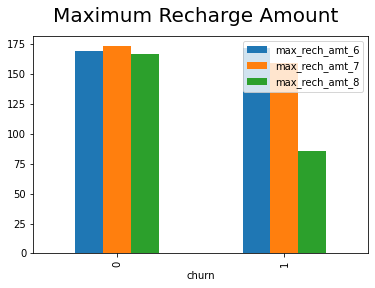

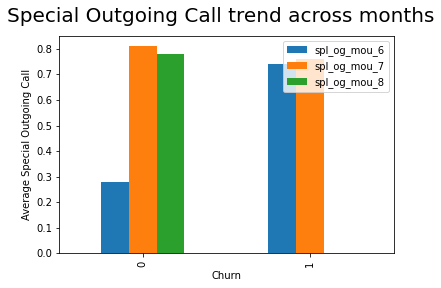

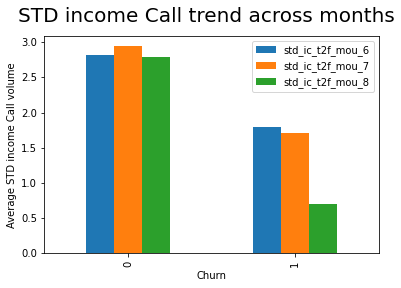

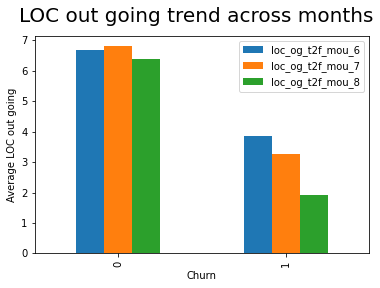

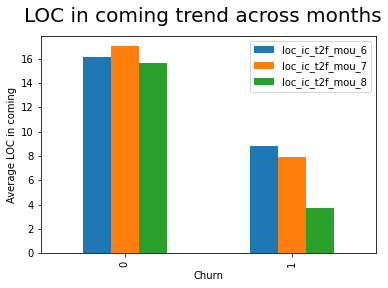

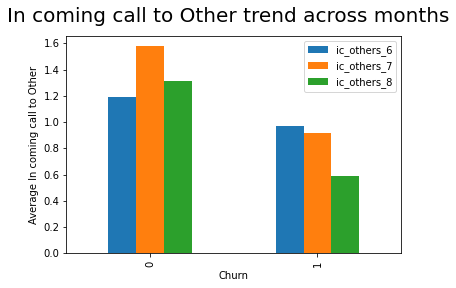

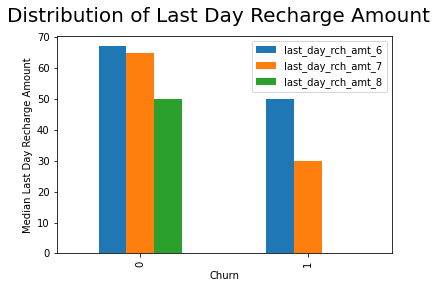

In [240]:
df_sample = telecom_high_val_cust_copy.groupby(['churn'])['arpu_6', 'arpu_7', 'arpu_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Arpu across months', fontsize=20)
plt.show()

df_sample = telecom_high_val_cust_copy.groupby(['churn'])['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('Average Incoming Call for August - Roaming trend across months', fontsize=20)
plt.show()

df_sample = telecom_high_val_cust_copy.groupby(['churn'])['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'].mean()
df_sample.plot.bar()
plt.suptitle('Maximum Recharge Amount', fontsize=20)
plt.show()


df_sample = telecom_high_val_cust_copy.groupby(['churn'])['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'].median()
df_sample.plot.bar()
plt.suptitle('Special Outgoing Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average Special Outgoing Call")
plt.show()


df_sample = telecom_high_val_cust_copy.groupby(['churn'])['std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('STD income Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average STD income Call volume")
plt.show()

df_sample = telecom_high_val_cust_copy.groupby(['churn'])['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('LOC out going trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC out going")
plt.show()

df_sample = telecom_high_val_cust_copy.groupby(['churn'])['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('LOC in coming trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC in coming")
plt.show()

df_sample = telecom_high_val_cust_copy.groupby(['churn'])['ic_others_6', 'ic_others_7', 'ic_others_8'].mean()
df_sample.plot.bar()
plt.suptitle('In coming call to Other trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average In coming call to Other")
plt.show()

#telecom_df2['churn'] = telecom_df2['churn'].astype('object', copy = False)
df_sample = telecom_high_val_cust_copy.groupby(['churn'])['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Last Day Recharge Amount', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Median Last Day Recharge Amount")
plt.show()

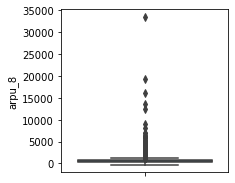

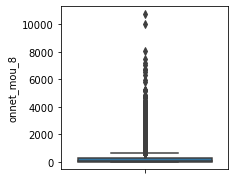

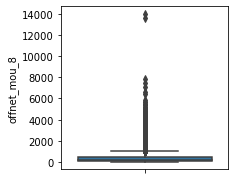

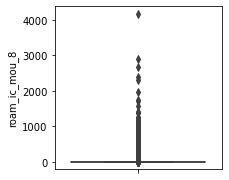

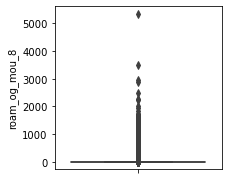

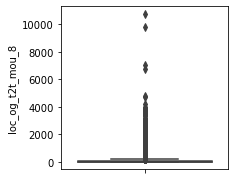

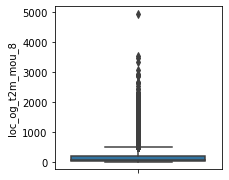

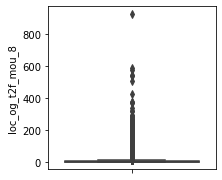

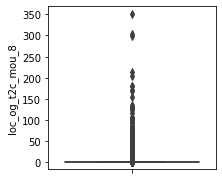

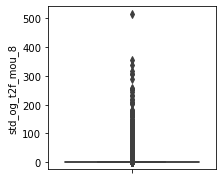

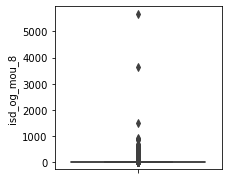

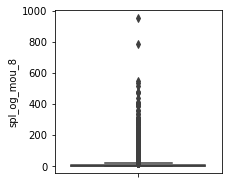

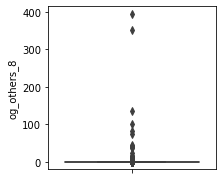

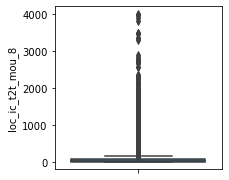

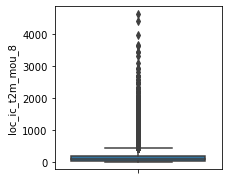

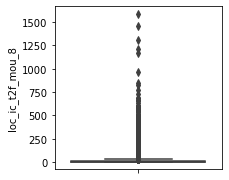

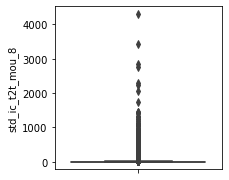

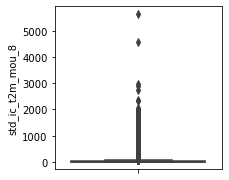

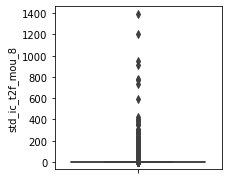

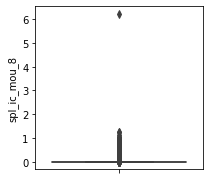

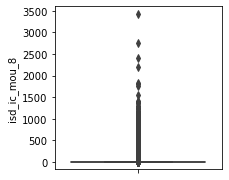

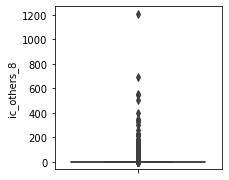

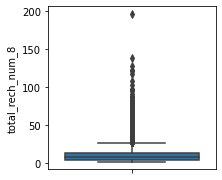

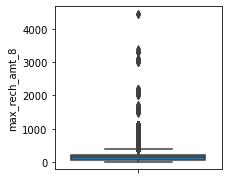

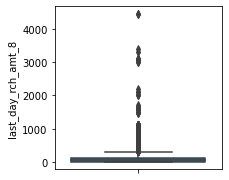

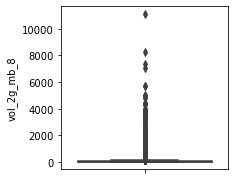

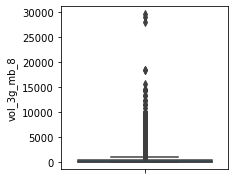

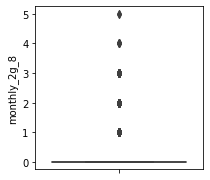

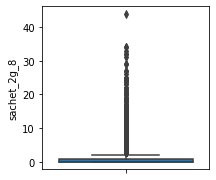

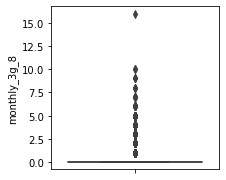

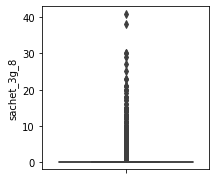

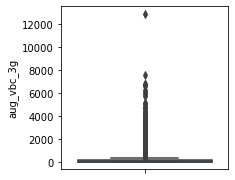

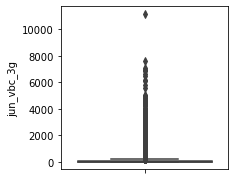

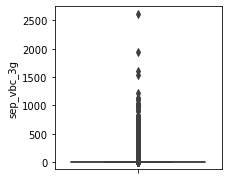

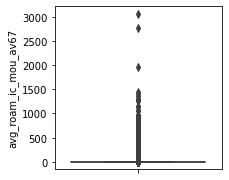

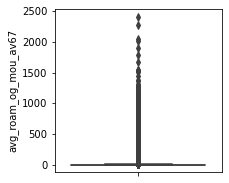

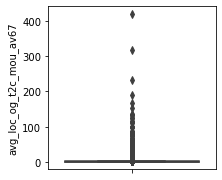

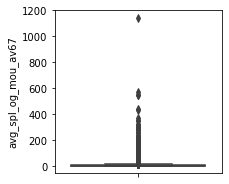

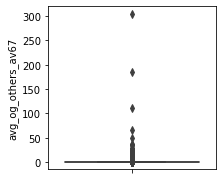

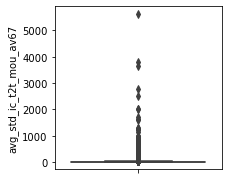

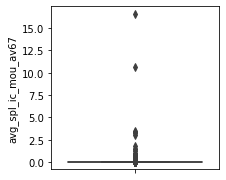

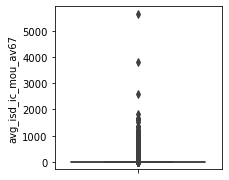

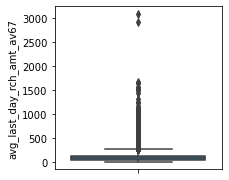

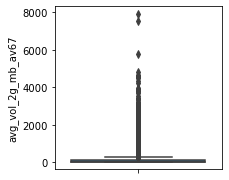

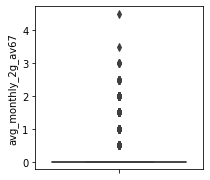

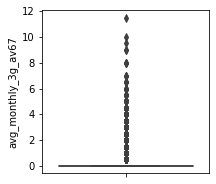

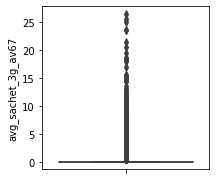

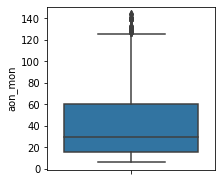

In [241]:
cont_cols = [col for col in telecom_high_val_cust.columns if col not in ['churn','mobile_number','date_of_last_rech_8','tenure_range']]
for col in cont_cols:
    plt.figure(figsize=(3, 3))
    sns.boxplot(y=col, data=telecom_high_val_cust)

In [242]:
# Creating a copy of this variable in case if needed later on
telecom_high_val_cust_copy1 = telecom_high_val_cust.copy()
print(telecom_high_val_cust_copy1.shape)
print(telecom_high_val_cust.shape)

(28163, 52)
(28163, 52)


# Outliers treatment

In [243]:
cont_cols = [col for col in telecom_high_val_cust.columns if col not in ['churn','mobile_number','date_of_last_rech_8','tenure_range']]

for col in cont_cols:
    percentiles = telecom_high_val_cust[col].quantile([0.01,0.99]).values
    telecom_high_val_cust[col][telecom_high_val_cust[col] <= percentiles[0]] = percentiles[0]
    telecom_high_val_cust[col][telecom_high_val_cust[col] >= percentiles[1]] = percentiles[1]

In [244]:
telecom_high_val_cust.shape

(28163, 52)

In [245]:
telecom_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28163 entries, 7 to 99997
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   mobile_number              28163 non-null  int64         
 1   arpu_8                     28163 non-null  float64       
 2   onnet_mou_8                28163 non-null  float64       
 3   offnet_mou_8               28163 non-null  float64       
 4   roam_ic_mou_8              28163 non-null  float64       
 5   roam_og_mou_8              28163 non-null  float64       
 6   loc_og_t2t_mou_8           28163 non-null  float64       
 7   loc_og_t2m_mou_8           28163 non-null  float64       
 8   loc_og_t2f_mou_8           28163 non-null  float64       
 9   loc_og_t2c_mou_8           28163 non-null  float64       
 10  std_og_t2f_mou_8           28163 non-null  float64       
 11  isd_og_mou_8               28163 non-null  float64       
 12  spl_

In [246]:
# Converting churn column to int in order to do aggfunc in the pivot table
telecom_high_val_cust['churn'] = telecom_high_val_cust['churn'].astype('int64')

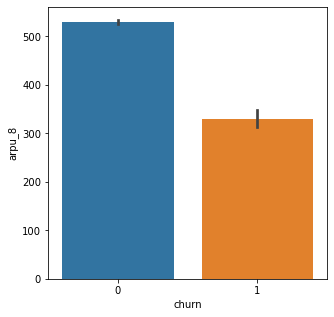

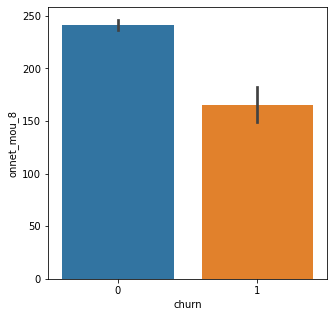

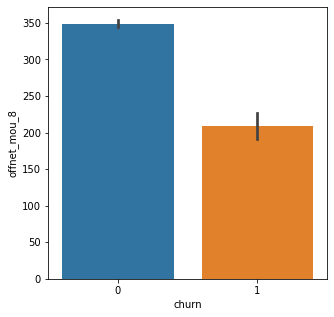

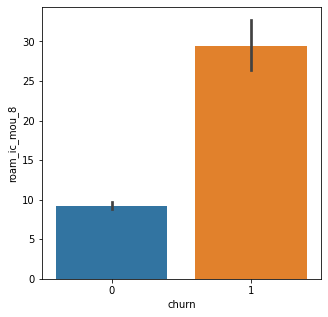

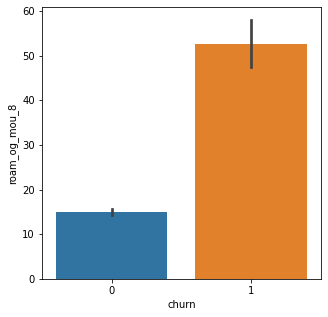

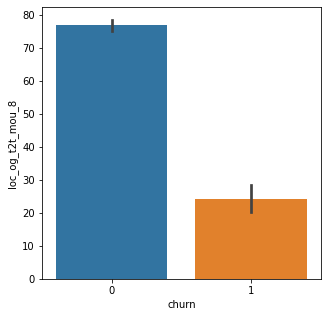

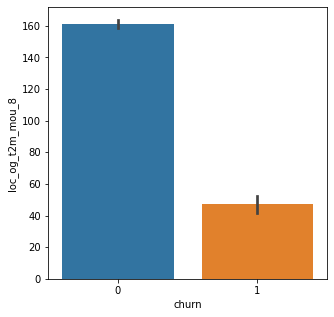

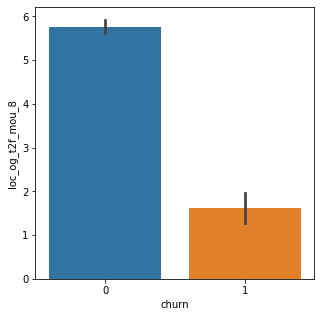

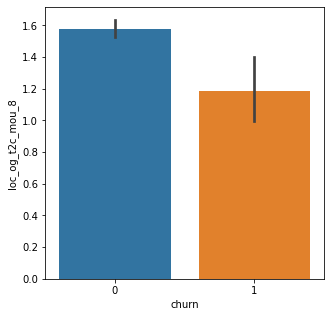

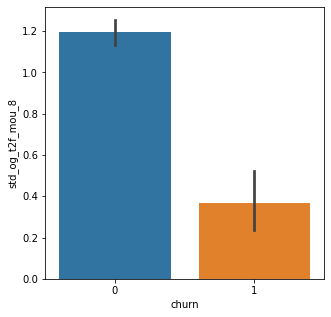

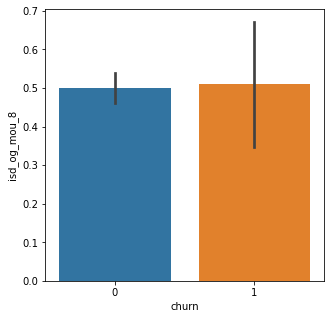

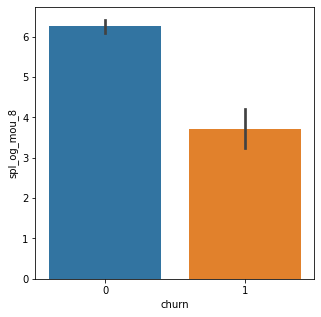

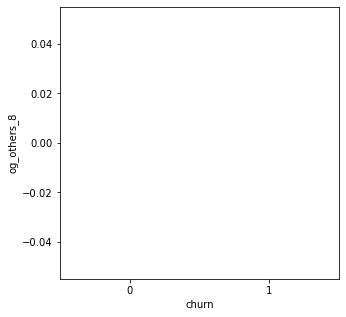

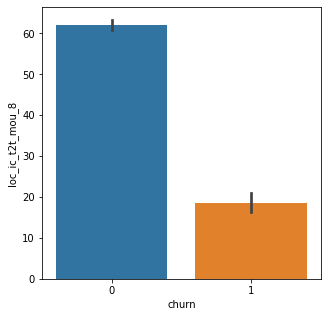

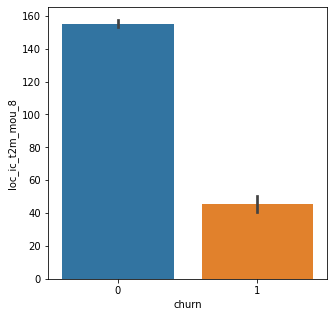

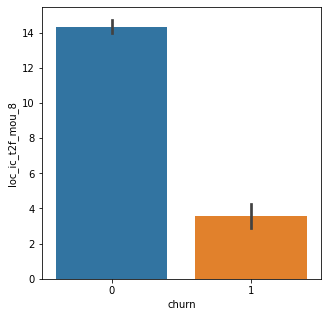

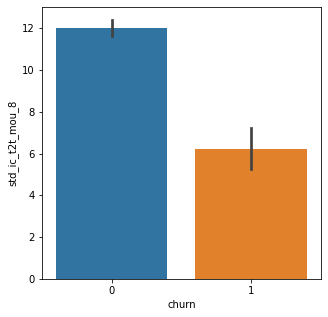

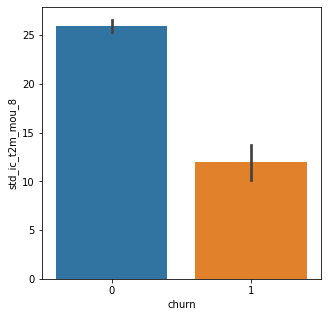

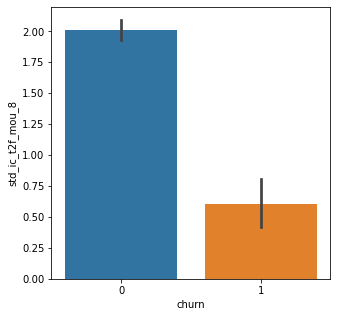

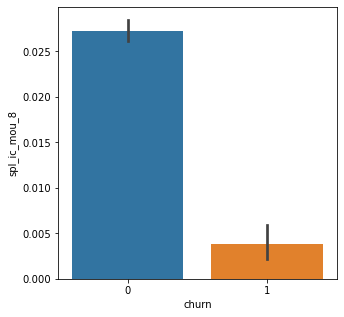

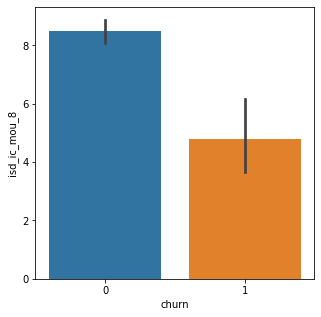

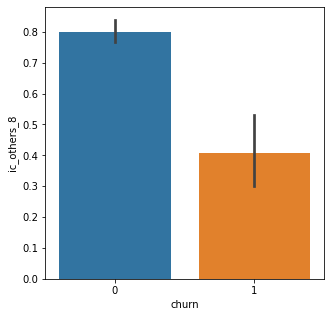

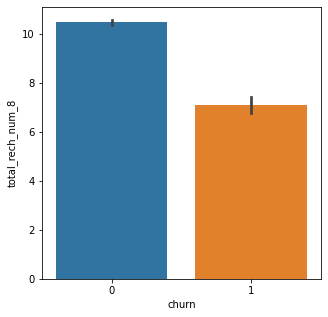

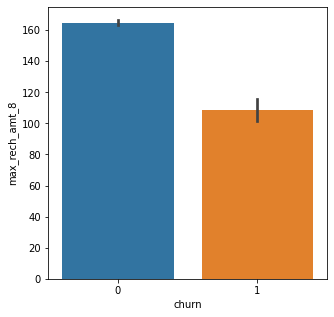

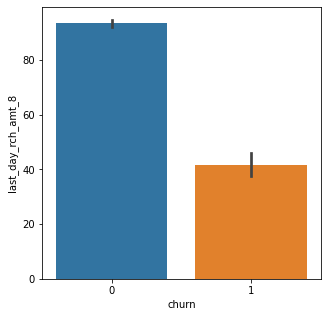

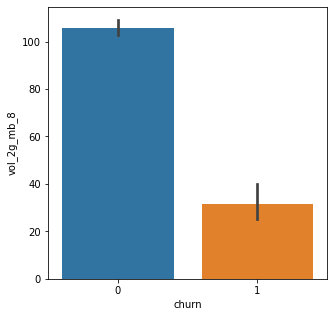

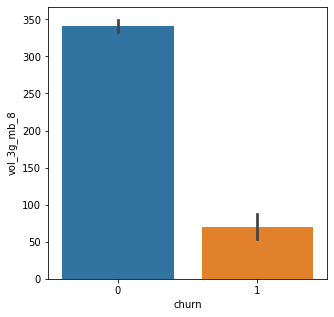

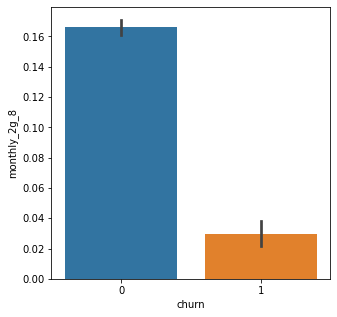

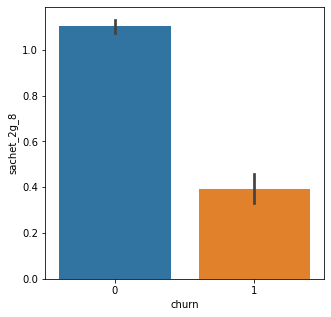

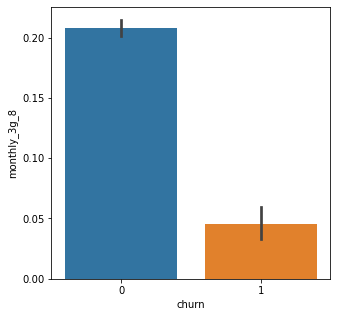

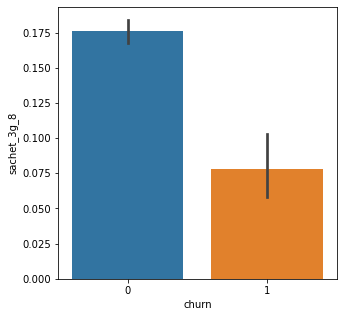

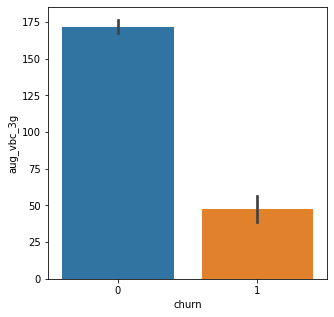

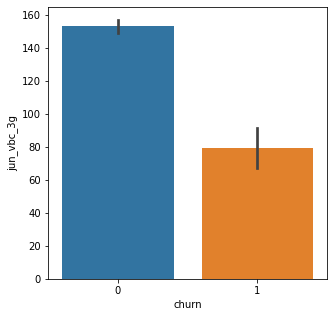

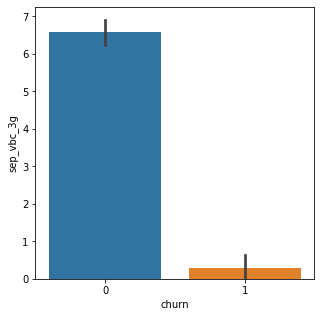

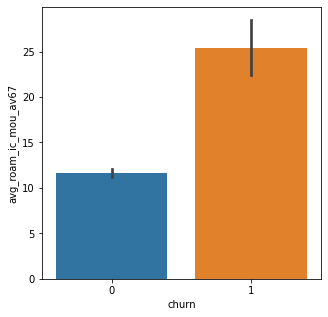

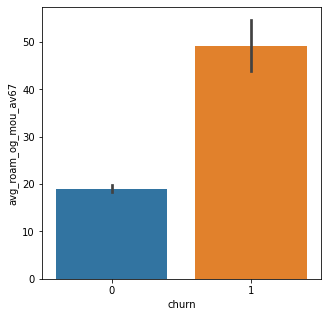

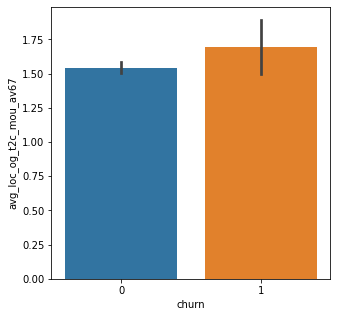

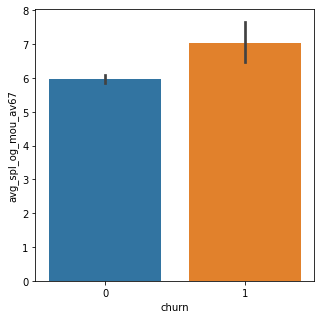

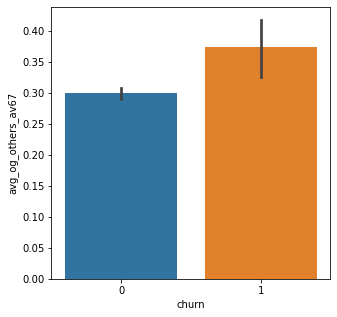

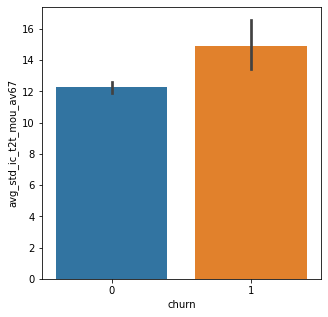

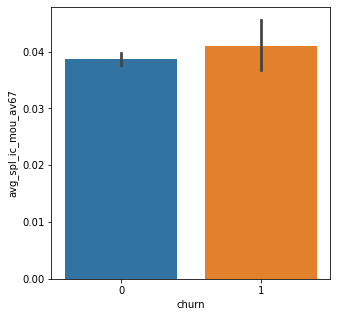

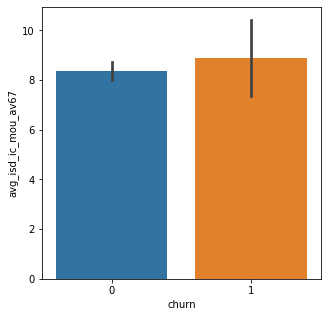

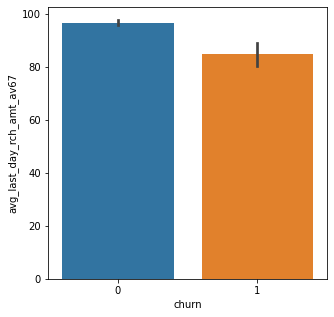

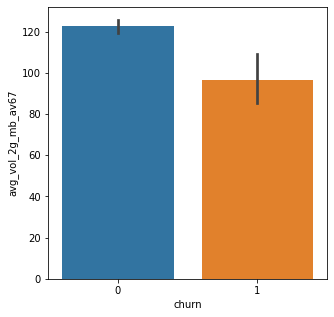

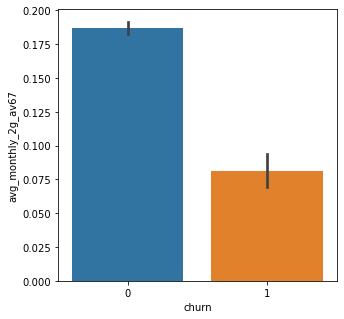

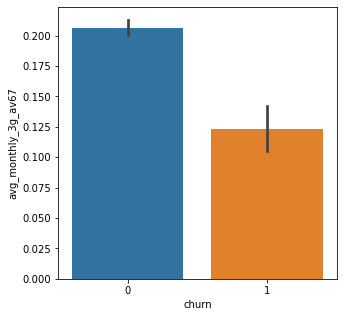

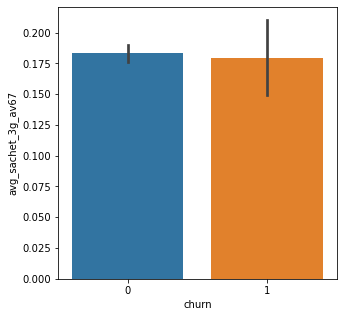

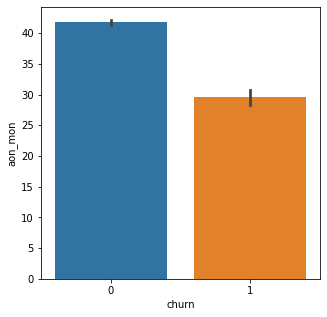

In [247]:
cont_cols = [col for col in telecom_high_val_cust.columns if col not in ['churn','mobile_number','date_of_last_rech_8','tenure_range']]

for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=telecom_high_val_cust)
    plt.show()

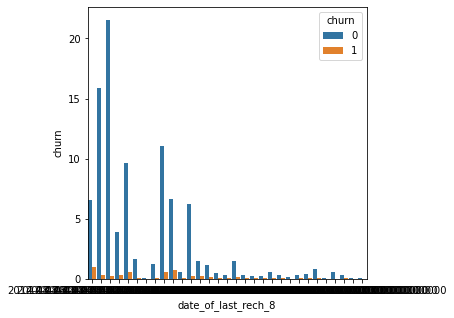

In [248]:
plt.figure(figsize=(5,5))
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=telecom_high_val_cust, estimator=lambda x: len(x) / len(telecom_high_val_cust) * 100)
plt.show()

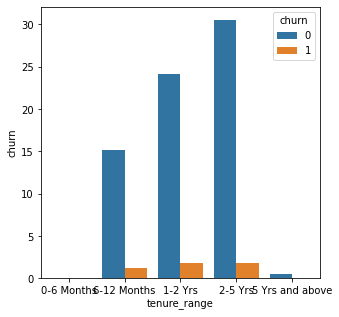

In [249]:
plt.figure(figsize=(5,5))
sns.barplot(x="tenure_range", y="churn", hue="churn", data=telecom_high_val_cust, estimator=lambda x: len(x) / len(telecom_high_val_cust) * 100)
plt.show()

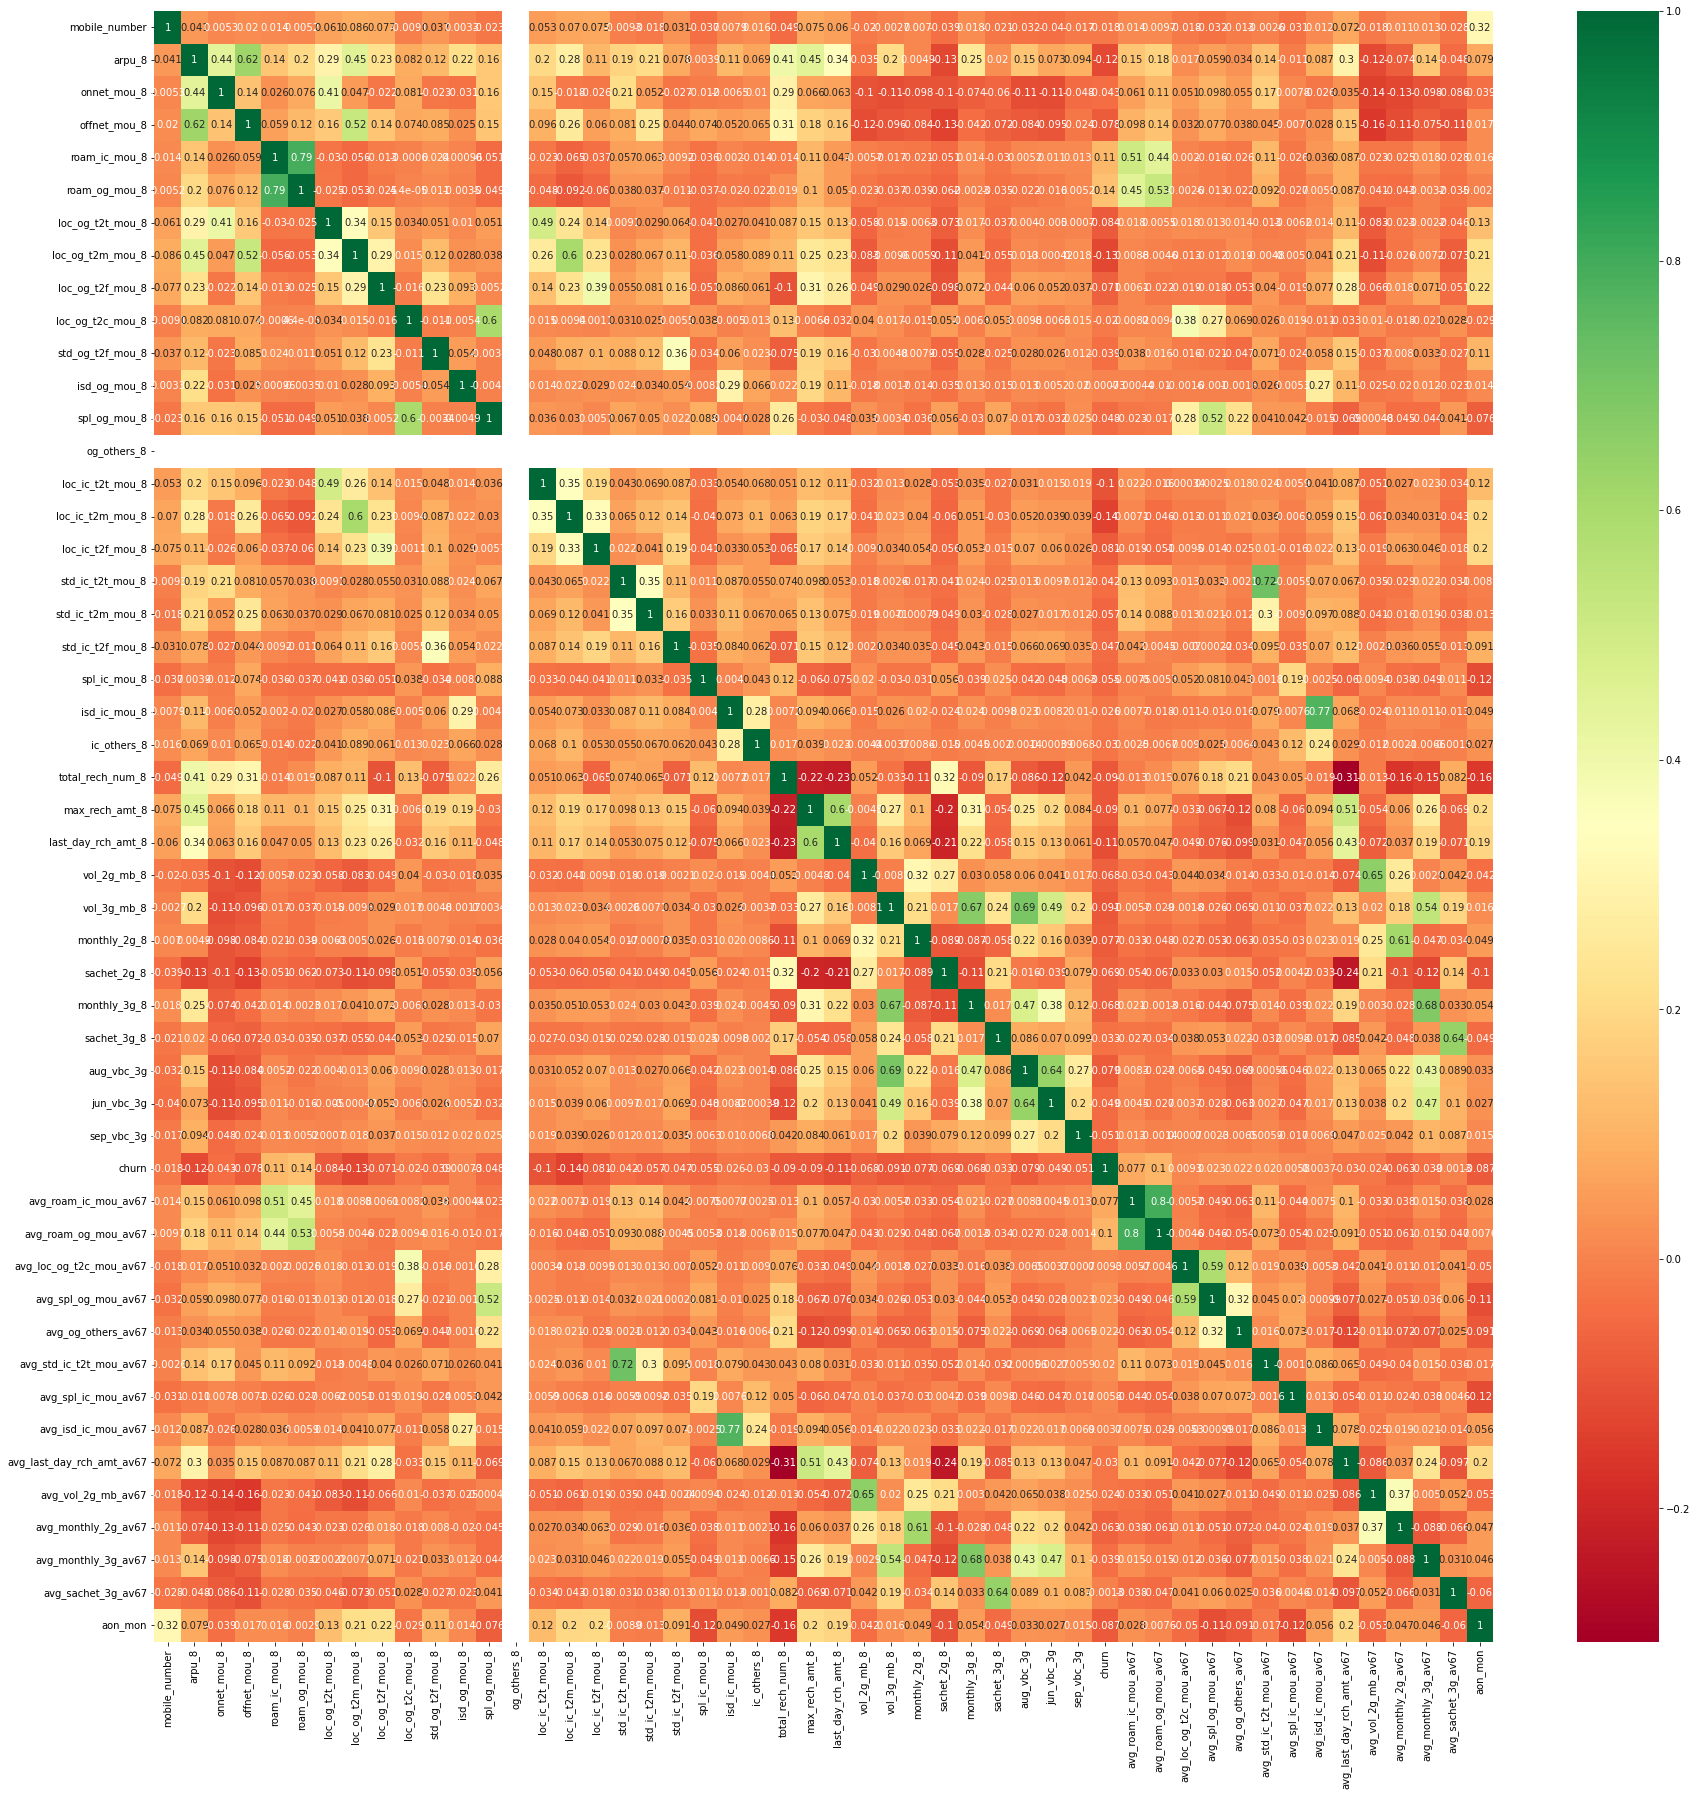

In [250]:
plt.figure(figsize=(30,30))
sns.heatmap(telecom_high_val_cust.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [251]:
# lets drop tenure range because it is highly correlated with AON MONTH column
telecom_high_val_cust.drop('tenure_range', axis=1, inplace=True)
telecom_high_val_cust.drop('mobile_number', axis=1, inplace=True)
telecom_high_val_cust.drop('date_of_last_rech_8', axis=1, inplace=True)
telecom_high_val_cust.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2f_mou_8,...,avg_og_others_av67,avg_std_ic_t2t_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,aon_mon
7,1989.35,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,16.68,...,0.00,24.36,0.10,8.29,0.00,0.00,0.00,0.00,0.00,26.73
8,137.36,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,0.00,...,0.00,0.29,0.00,0.00,25.00,178.00,0.50,0.00,0.00,10.50
21,637.76,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,0.00,...,0.00,10.02,0.00,0.00,25.00,0.00,0.00,0.00,0.00,24.00
23,366.97,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,0.00,...,0.00,0.26,0.00,14.12,89.50,0.24,0.00,1.00,0.00,20.13
33,409.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,...,0.00,1.46,0.00,0.00,126.00,72.41,0.00,2.50,2.00,44.27


# Modelling

In [252]:
# lets create X & y dataset for model building, X will obviously not have "churn" and y will only have "churn"
X = telecom_high_val_cust.drop(['churn'], axis=1)
y = telecom_high_val_cust['churn']

In [253]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [254]:
# divide data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

In [255]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19714, 48)
(19714,)
(8449, 48)
(8449,)


In [256]:
telecom_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28163 entries, 7 to 99997
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   arpu_8                     28163 non-null  float64
 1   onnet_mou_8                28163 non-null  float64
 2   offnet_mou_8               28163 non-null  float64
 3   roam_ic_mou_8              28163 non-null  float64
 4   roam_og_mou_8              28163 non-null  float64
 5   loc_og_t2t_mou_8           28163 non-null  float64
 6   loc_og_t2m_mou_8           28163 non-null  float64
 7   loc_og_t2f_mou_8           28163 non-null  float64
 8   loc_og_t2c_mou_8           28163 non-null  float64
 9   std_og_t2f_mou_8           28163 non-null  float64
 10  isd_og_mou_8               28163 non-null  float64
 11  spl_og_mou_8               28163 non-null  float64
 12  og_others_8                28163 non-null  float64
 13  loc_ic_t2t_mou_8           28163 non-null  flo

In [257]:
!pip install imbalanced-learn

In [258]:
# Imporing SMOTE
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [259]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [260]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_sample(X_train, y_train)

# Feature Scaling

In [261]:
# Instantiate the Scaler
scaler = StandardScaler()

In [262]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()

In [263]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [264]:
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2f_mou_8,...,avg_og_others_av67,avg_std_ic_t2t_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,aon_mon
0,-0.37,-0.51,-0.41,-0.25,0.18,-0.41,-0.57,-0.34,-0.34,-0.20,...,-0.43,-0.25,-0.50,-0.28,1.43,-0.20,1.19,0.82,-0.33,-0.46
1,-0.42,-0.33,-0.21,-0.36,-0.39,0.25,0.46,0.41,-0.34,-0.20,...,-0.43,-0.47,1.16,-0.28,-0.27,-0.45,-0.41,-0.38,-0.33,2.68
2,-0.38,-0.47,-0.13,-0.36,-0.39,-0.17,0.60,-0.31,3.85,-0.20,...,-0.43,-0.47,1.98,-0.01,0.60,-0.43,-0.41,0.82,-0.33,1.90
3,-0.27,-0.53,-0.42,-0.36,-0.39,-0.37,-0.23,-0.34,5.16,-0.20,...,-0.35,-0.47,-0.50,-0.28,-0.78,3.62,-0.41,-0.38,0.54,-0.42
4,1.06,-0.48,0.08,-0.36,-0.39,-0.21,0.41,1.60,6.97,-0.20,...,-0.43,-0.47,-0.50,-0.20,2.01,-0.45,-0.41,-0.38,-0.33,1.86


Scaling the test set:
We don't fit scaler on the test set. We only transform the test set.

In [265]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2f_mou_8,...,avg_og_others_av67,avg_std_ic_t2t_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,aon_mon
13249,-0.11,0.31,0.94,-0.36,-0.39,2.17,0.89,-0.34,0.20,-0.20,...,-0.43,-0.24,1.03,-0.28,-0.10,-0.45,-0.41,-0.38,-0.33,-0.80
63784,2.48,-0.15,-0.07,5.24,4.65,-0.42,-0.60,-0.34,-0.29,-0.20,...,-0.43,-0.47,-0.50,-0.28,5.12,-0.45,-0.41,-0.38,-0.33,-0.53
13106,-0.30,-0.09,-0.50,-0.36,-0.39,-0.38,-0.43,-0.34,-0.34,-0.20,...,-0.17,-0.34,-0.50,-0.28,0.38,1.19,-0.41,-0.38,0.54,-0.96
49091,0.41,1.05,1.41,-0.36,-0.39,-0.39,-0.10,-0.34,-0.21,-0.20,...,2.35,-0.47,2.30,0.11,-0.24,-0.45,-0.41,-0.38,-0.33,-0.81
36619,0.20,-0.53,-0.44,-0.36,-0.39,-0.39,-0.34,-0.34,-0.34,-0.20,...,-0.43,-0.24,-0.50,-0.28,-0.41,1.03,1.19,0.82,-0.33,0.10


# Model with PCA

In [266]:
#Import PCA
from sklearn.decomposition import PCA

In [267]:
# Instantiate PCA
pca = PCA(random_state=42)

In [268]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [269]:
# Principal components
pca.components_

array([[ 3.19840574e-01,  1.14054942e-01,  2.02584815e-01, ...,
         1.66383472e-01, -2.35231489e-02,  1.53080412e-01],
       [ 1.76774913e-01,  1.78083306e-01,  1.91682950e-01, ...,
        -1.84606059e-01, -1.51642538e-01,  8.99991097e-03],
       [-6.92536806e-02, -1.81878727e-01, -1.61038813e-01, ...,
         2.07853519e-01, -9.30785053e-03,  6.20158504e-02],
       ...,
       [-8.02418143e-01,  2.59119493e-01,  3.11093418e-01, ...,
         4.23736513e-03,  5.92973398e-03,  1.44585175e-02],
       [ 1.36174463e-01, -4.47847468e-02, -7.91648053e-02, ...,
        -1.78847395e-02, -1.28100231e-02,  8.12437896e-04],
       [-2.47345067e-18, -1.12462248e-17,  4.49237384e-17, ...,
        -1.19538821e-17, -3.21234677e-17, -2.21967924e-16]])

In [270]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.11714234 0.19233799 0.26387721 0.3186741  0.36344122 0.40603988
 0.44494046 0.48113768 0.51342162 0.54121522 0.56783352 0.59194429
 0.61531131 0.63763089 0.65969072 0.68041088 0.69965689 0.71809202
 0.73566749 0.75279651 0.76980181 0.78544685 0.80053015 0.8149988
 0.82941702 0.84322678 0.85674318 0.86922195 0.88051254 0.89157613
 0.90221217 0.91188023 0.9213751  0.93008501 0.93841484 0.94567846
 0.95278253 0.95944981 0.9656705  0.97145998 0.97687177 0.98199691
 0.98698989 0.99186169 0.9954239  0.99787154 1.         1.        ]


Text(0, 0.5, 'Cumulative Variance')

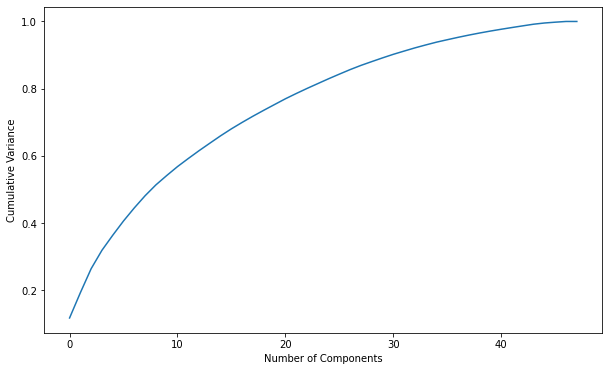

In [271]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can see that 32 components explain amost more than 90% variance of the data. So, we will perform PCA with 32 components.

Performing PCA with 32 components

In [272]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [273]:
# Instantiate PCA with 32 components
pca_final = IncrementalPCA(n_components=32)

In [274]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

In [275]:
# Applying transformation on the test set
X_test_pca = pca_final.transform(X_test)

Emphasize Sensitivity/Recall than Accuracy
We are more focused on higher Sensitivity/Recall score than the accuracy.

Beacuse we need to care more about churn cases than the not churn cases. 
The main goal is to reatin the customers, who have the possiblity to churn. There should not be a problem, 
if we consider few non churn customers as churn customers and provide them some incentives for retaining them. 
Hence, the sensitivity score is more important here.

# Logistic Regression with PCA

In [276]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Tuning hyperparameter C

In [277]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [278]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [279]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.05,0.00,0.00,0.00,0.01,{'C': 0.01},0.83,0.84,0.84,0.84,...,0.84,0.01,1,0.84,0.84,0.84,0.84,0.84,0.84,0.00
1,0.14,0.09,0.00,0.00,0.10,{'C': 0.1},0.83,0.84,0.84,0.84,...,0.84,0.01,6,0.84,0.84,0.84,0.83,0.84,0.84,0.00
2,0.07,0.01,0.00,0.00,1,{'C': 1},0.83,0.84,0.84,0.84,...,0.84,0.01,2,0.84,0.84,0.84,0.84,0.84,0.84,0.00
3,0.06,0.01,0.00,0.00,10,{'C': 10},0.83,0.84,0.84,0.84,...,0.84,0.01,3,0.84,0.84,0.84,0.84,0.84,0.84,0.00
4,0.05,0.01,0.00,0.00,100,{'C': 100},0.83,0.84,0.84,0.84,...,0.84,0.01,3,0.84,0.84,0.84,0.84,0.84,0.84,0.00
5,0.05,0.01,0.00,0.00,1000,{'C': 1000},0.83,0.84,0.84,0.84,...,0.84,0.01,3,0.84,0.84,0.84,0.84,0.84,0.84,0.00


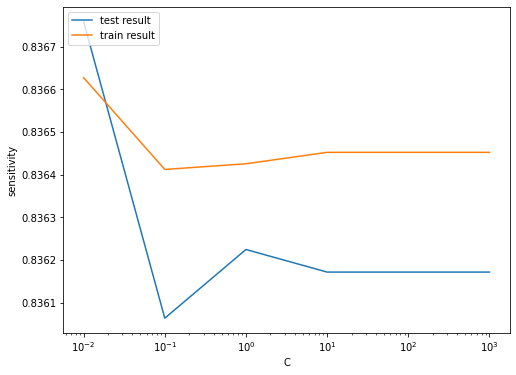

In [280]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [281]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8367589251733449 at C = 0.01


# Logistic Regression with optimal C

In [282]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [283]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [284]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [285]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[14274  4363]
 [ 3046 15591]]


In [286]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [287]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8012287385308794
Sensitivity:- 0.8365616783817138
Specificity:- 0.7658957986800451


Prediction on the test set

In [288]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [289]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6154 1834]
 [  96  365]]


In [290]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [291]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7715706000710143
Sensitivity:- 0.7917570498915402
Specificity:- 0.770405608412619


*Model summary*

Train set

* Accuracy:- 0.8012287385308794
* Sensitivity:- 0.8365616783817138
* Specificity:- 0.7658957986800451 

Test set

* Accuracy:- 0.7715706000710143
* Sensitivity:- 0.7917570498915402
* Specificity:- 0.770405608412619 

Overall, the model is performing well in the test set, what it had learnt from the train set.

# Decision Tree with PCA

In [292]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

Hyperparameter tuning

In [293]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [294]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.53,0.01,0.00,0.00,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.74,0.78,0.80,0.74,0.73,0.76,0.03,5
1,0.52,0.00,0.00,0.00,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.74,0.78,0.80,0.74,0.73,0.76,0.03,5
2,0.50,0.01,0.00,0.00,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.74,0.78,0.80,0.74,0.72,0.76,0.03,7
3,0.50,0.01,0.00,0.00,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.74,0.78,0.80,0.74,0.72,0.76,0.03,7
4,0.85,0.02,0.00,0.00,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.82,0.85,0.83,0.83,0.83,0.83,0.01,1
5,0.92,0.05,0.01,0.00,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.82,0.85,0.83,0.83,0.83,0.83,0.01,2
6,0.90,0.02,0.00,0.00,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.82,0.82,0.81,0.83,0.81,0.82,0.01,3
7,0.90,0.02,0.00,0.00,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.82,0.82,0.81,0.83,0.81,0.82,0.01,3


In [295]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.8322693061075022
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


Model with optimal hyperparameters

In [296]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=10)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=10,
                       random_state=100)

In [297]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [298]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[15644  2993]
 [ 2476 16161]]


In [299]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [300]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8532757418039384
Sensitivity:- 0.8671459998926866
Specificity:- 0.8394054837151902


In [301]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [302]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6546 1442]
 [ 185  276]]


In [303]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [304]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8074328322878447
Sensitivity:- 0.5986984815618221
Specificity:- 0.8194792188282424


*Model summary*

Train set
* Accuracy:- 0.8532757418039384
* Sensitivity:- 0.8671459998926866
* Specificity:- 0.8394054837151902 

Test set
* Accuracy:- 0.8074328322878447
* Sensitivity:- 0.5986984815618221
* Specificity:- 0.8194792188282424 

We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set.
However, the accuracy and specificity is quite good in the test set.

# Random Forest with PCA

Hyperparameter tuning

In [305]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [307]:
# printing the optimal accuracy score and hyperparameters.
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8014434730296353 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}


Model with optimal hyperparameters

In [308]:
# model with the best hyperparameters
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=100)

In [309]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100)

In [310]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [311]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[15737  2900]
 [ 4305 14332]]


In [312]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [313]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8067017223802114
Sensitivity:- 0.7690078875355476
Specificity:- 0.8443955572248752


In [314]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [315]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6778 1210]
 [ 150  311]]


In [316]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [317]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8390342052313883
Sensitivity:- 0.6746203904555315
Specificity:- 0.8485227841762644


*Model summary*

Train set
* Accuracy:- 0.8062992970971723
* Sensitivity:- 0.7692761710575736
* Specificity:- 0.843322423136771 

Test set
* Accuracy:- 0.8376139188069595
* Sensitivity:- 0.6767895878524945
* Specificity:- 0.8468953430145217

We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set.
However, the accuracy and specificity is quite good in the test set.

# Logistic Regression With No PCA

In [318]:
telecom_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28163 entries, 7 to 99997
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   arpu_8                     28163 non-null  float64
 1   onnet_mou_8                28163 non-null  float64
 2   offnet_mou_8               28163 non-null  float64
 3   roam_ic_mou_8              28163 non-null  float64
 4   roam_og_mou_8              28163 non-null  float64
 5   loc_og_t2t_mou_8           28163 non-null  float64
 6   loc_og_t2m_mou_8           28163 non-null  float64
 7   loc_og_t2f_mou_8           28163 non-null  float64
 8   loc_og_t2c_mou_8           28163 non-null  float64
 9   std_og_t2f_mou_8           28163 non-null  float64
 10  isd_og_mou_8               28163 non-null  float64
 11  spl_og_mou_8               28163 non-null  float64
 12  og_others_8                28163 non-null  float64
 13  loc_ic_t2t_mou_8           28163 non-null  flo

In [319]:
import statsmodels.api as sm1
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [320]:
# Logistic Regression Model
logm1 = sm1.GLM(y_train, (sm1.add_constant(X_train)), family = sm1.families.Binomial()) 
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37274
Model:                            GLM   Df Residuals:                    37226
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 04 Dec 2022   Deviance:                   7.3931e+05
Time:                        20:16:52   Pearson chi2:                 3.62e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -5.175e+14   3.48e+05  -1.49e+09      0.000   -5.17e+14   -5.17e+14
arpu_8                     2.803e+14   8.56e+05   3.27e+08      0.000     2.8e+14     2.8e+14
onnet_mou_8               -2.123e+14   5.05e+05   -4.2e+08      0.000   -2.12e+14   -2.12e+14
offnet_mou_8              -1.527e+14   5.66e+05   -2.7e+08      0.000   -1.53e+14   -1.53e+14
roam_ic_mou_8              3.538e+13    6.5e+05   5.44e+07      0.000    3.54e+13    3.54e+13
roam_og_mou_8              1.649e+14   6.82e+05   2.42e+08      0.000    1.65e+14    1.65e+14
loc_og_t2t_mou_8          -1.045e+13   4.69e+05  -2.23e+07      0.000   -1.04e+13   -1.04e+13
loc_og_t2m_mou_8           -1.16e+14   5.58e+05  -2.08e+08      0.000   -1.16e+14   -1.16e+14
loc_og_t2f_mou_8           -4.21e+12   4.21e+05     -1e+07      0.000   -4.21e+12   -4.21e+12
loc_og_t2c_mou_8            1.72e+13   4.71e+05   3.65e+07      0.000    1.72e+13    1.72e+13
std_og_t2f_mou_8          -1.759e+13   3.87e+05  -4.54e+07      0.000   -1.76e+13   -1.76e+13
isd_og_mou_8               3.826e+12   4.03e+05   9.49e+06      0.000    3.83e+12    3.83e+12
spl_og_mou_8              -8.294e+13   5.17e+05  -1.61e+08      0.000   -8.29e+13   -8.29e+13
og_others_8                  -0.0888   6.13e-10  -1.45e+08      0.000      -0.089      -0.089
loc_ic_t2t_mou_8          -1.023e+14   4.43e+05  -2.31e+08      0.000   -1.02e+14   -1.02e+14
loc_ic_t2m_mou_8           -1.14e+14   5.13e+05  -2.22e+08      0.000   -1.14e+14   -1.14e+14
loc_ic_t2f_mou_8          -2.755e+13   4.12e+05  -6.69e+07      0.000   -2.75e+13   -2.75e+13
std_ic_t2t_mou_8          -1.516e+14   4.85e+05  -3.13e+08      0.000   -1.52e+14   -1.52e+14
std_ic_t2m_mou_8          -9.354e+13   4.03e+05  -2.32e+08      0.000   -9.35e+13   -9.35e+13
std_ic_t2f_mou_8          -1.311e+13   3.89e+05  -3.37e+07      0.000   -1.31e+13   -1.31e+13
spl_ic_mou_8              -9.347e+13   3.61e+05  -2.59e+08      0.000   -9.35e+13   -9.35e+13
isd_ic_mou_8              -7.561e+13   5.13e+05  -1.47e+08      0.000   -7.56e+13   -7.56e+13
ic_others_8               -3.358e+13   3.68e+05  -9.13e+07      0.000   -3.36e+13   -3.36e+13
total_rech_num_8          -3.543e+14   5.41e+05  -6.54e+08      0.000   -3.54e+14   -3.54e+14
max_rech_amt_8             9.945e+12   5.54e+05    1.8e+07      0.000    9.94e+12    9.94e+12
last_day_rch_amt_8        -3.356e+14   4.81e+05  -6.98e+08      0.000   -3.36e+14   -3.36e+14
vol_2g_mb_8               -7.849e+13   4.82e+05  -1.63e+08      0.000   -7.85e+13   -7.85e+13
vol_3g_mb_8                1.888e+13   6.65e+05   2.84e+07      0.000    1.89e+13    1.89e+13
monthly_2g_8              -1.376e+14   4.77e+05  -2.88e+08      0.000   -1.38e+14   -1.38e+14
sachet_2g_8               -2.445e+14   4.31e+05  -5.67e+08      0.000   -2.

# Feature selection using RFE

In [321]:
# Importing RFE
from sklearn.feature_selection import RFE

In [322]:
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15) # Running RFE with 15 features

In [323]:
rfe = rfe.fit(X_train, y_train)

In [324]:
rfe.support_

array([ True,  True,  True, False,  True, False,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False,  True, False, False,  True, False,  True, False, False,
        True,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True])

In [325]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', False, 24),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', False, 31),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 32),
 ('loc_og_t2c_mou_8', False, 23),
 ('std_og_t2f_mou_8', False, 12),
 ('isd_og_mou_8', False, 15),
 ('spl_og_mou_8', False, 22),
 ('og_others_8', False, 34),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', False, 9),
 ('std_ic_t2t_mou_8', False, 4),
 ('std_ic_t2m_mou_8', False, 11),
 ('std_ic_t2f_mou_8', False, 18),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 13),
 ('ic_others_8', False, 28),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_8', False, 10),
 ('last_day_rch_amt_8', True, 1),
 ('vol_2g_mb_8', False, 33),
 ('vol_3g_mb_8', False, 7),
 ('monthly_2g_8', True, 1),
 ('sachet_2g_8', True, 1),
 ('monthly_3g_8', True, 1),
 ('sachet_3g_8', False, 2),
 ('aug_vbc_3g', False, 8),
 ('jun_vbc_3g', False, 29),


In [326]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8',
       'loc_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g', 'aon_mon'],
      dtype='object')


# Model 1 with selected RFE features

In [327]:
# Adding constant to X_train
X_train_sm_1 = sm1.add_constant(X_train[rfe_cols])

#Instantiate the model
logreg_no_pca_1 = sm1.GLM(y_train, X_train_sm_1, family=sm1.families.Binomial())

# Fit the model
logreg_no_pca_1 = logreg_no_pca_1.fit()

logreg_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37274
Model:                            GLM   Df Residuals:                    37258
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15806.
Date:                Sun, 04 Dec 2022   Deviance:                       31612.
Time:                        20:16:56   Pearson chi2:                 1.06e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4259      0.019    -22.952      0.000      -0.462      -0.390
arpu_8                 0.5786      0.034     17.177      0.000       0.513       0.645
onnet_mou_8           -0.3694      0.018    -20.455      0.000      -0.405      -0.334
offnet_mou_8          -0.2875      0.021    -13.731      0.000      -0.329      -0.246
roam_og_mou_8          0.4634      0.020     22.938      0.000       0.424       0.503
loc_og_t2m_mou_8      -0.4406      0.029    -15.256      0.000      -0.497      -0.384
loc_ic_t2t_mou_8      -0.4591      0.027    -16.928      0.000      -0.512      -0.406
loc_ic_t2m_mou_8      -0.3738      0.028    -13.451      0.000      -0.428      -0.319
spl_ic_mou_8          -0.4001      0.020    -20.033      0.000      -0.439      -0.361
total_rech_num_8      -0.4572      0.020    -22.703      0.000      -0.497      -0.418
last_day_rch_amt_8    -0.6203      0.019    -32.237      0.000      -0.658      -0.583
monthly_2g_8          -0.9359      0.028    -33.541      0.000      -0.991      -0.881
sachet_2g_8           -0.6440      0.020    -32.373      0.000      -0.683      -0.605
monthly_3g_8          -0.8351      0.026    -32.491      0.000      -0.885      -0.785
sep_vbc_3g            -0.9255      0.062    -14.819      0.000      -1.048      -0.803
aon_mon               -0.3691      0.016    -23.132      0.000      -0.400      -0.338
======================================================================================
"""

# Checking VIFs

In [328]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,4.16
4,loc_og_t2m_mou_8,2.35
2,offnet_mou_8,2.32
6,loc_ic_t2m_mou_8,2.03
8,total_rech_num_8,1.98
1,onnet_mou_8,1.58
9,last_day_rch_amt_8,1.48
5,loc_ic_t2t_mou_8,1.31
3,roam_og_mou_8,1.26
11,sachet_2g_8,1.26


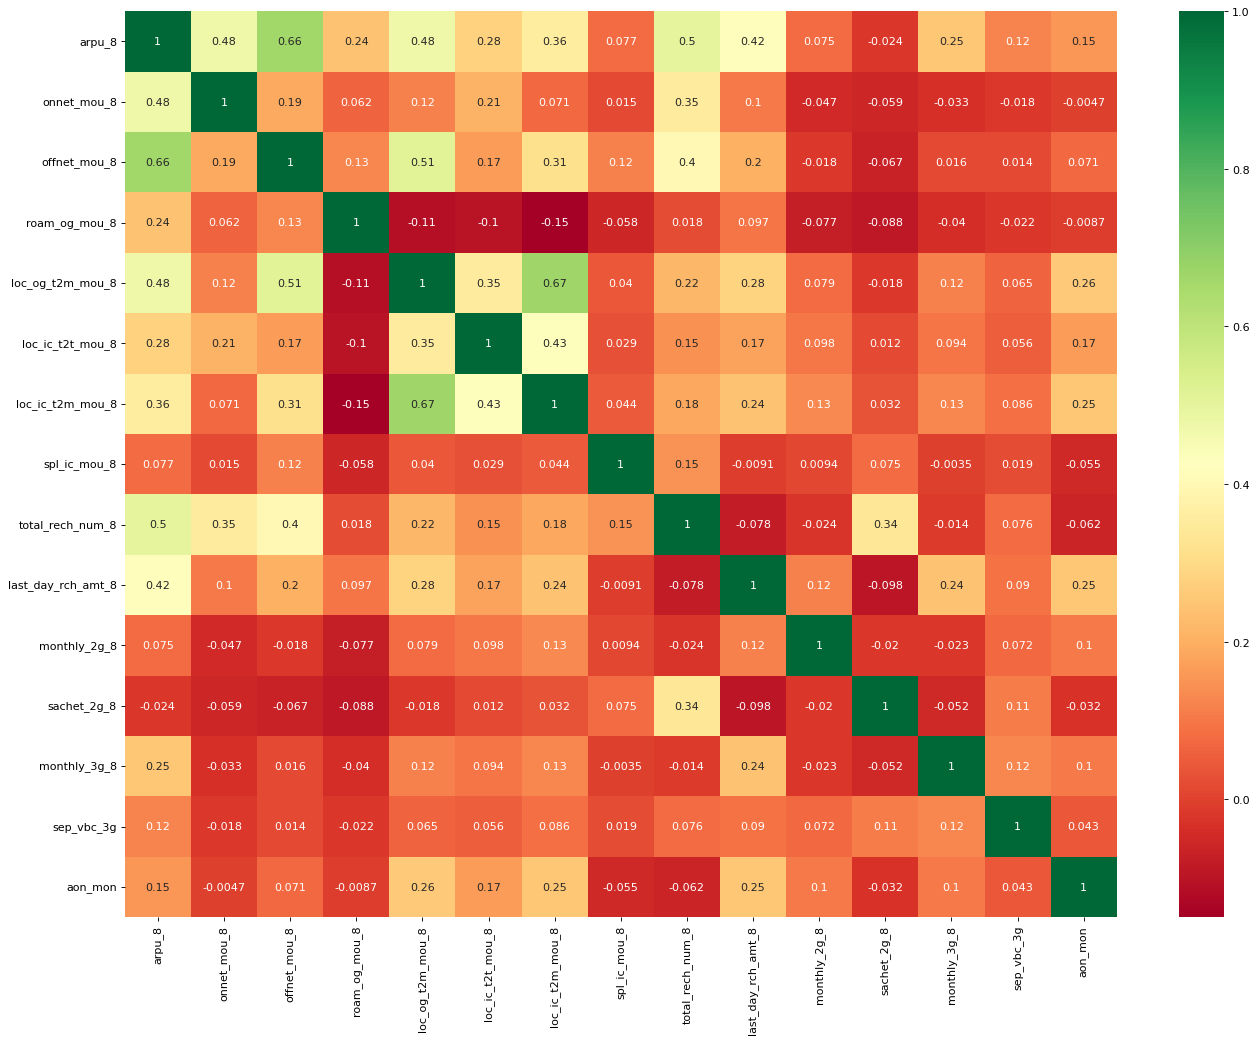

In [329]:
# Correlation matrix
plt.figure(figsize=(20,15), dpi=80)

sns.heatmap(X_train[rfe_cols].corr(), annot=True, cmap="RdYlGn")

plt.show()

In [330]:
# Removing arpu_8 column
log_cols = rfe_cols.to_list()
log_cols.remove('arpu_8')
print(log_cols)

['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g', 'aon_mon']


# Model 2 

Building the model after removing arpu_8 variable.

In [331]:
# Adding constant to X_train
X_train_sm_2 = sm1.add_constant(X_train[log_cols])

#Instantiate the model
logreg_no_pca_2 = sm1.GLM(y_train, X_train_sm_2, family=sm1.families.Binomial())

# Fit the model
logreg_no_pca_2 = logreg_no_pca_2.fit()

logreg_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37274
Model:                            GLM   Df Residuals:                    37259
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15960.
Date:                Sun, 04 Dec 2022   Deviance:                       31921.
Time:                        20:16:59   Pearson chi2:                 8.01e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3911      0.018    -21.673      0.000      -0.426      -0.356
onnet_mou_8           -0.2034      0.015    -13.495      0.000      -0.233      -0.174
offnet_mou_8          -0.0794      0.017     -4.663      0.000      -0.113      -0.046
roam_og_mou_8          0.5592      0.020     28.667      0.000       0.521       0.597
loc_og_t2m_mou_8      -0.3553      0.027    -12.983      0.000      -0.409      -0.302
loc_ic_t2t_mou_8      -0.4234      0.026    -16.036      0.000      -0.475      -0.372
loc_ic_t2m_mou_8      -0.3505      0.027    -12.933      0.000      -0.404      -0.297
spl_ic_mou_8          -0.3921      0.020    -19.884      0.000      -0.431      -0.353
total_rech_num_8      -0.3297      0.018    -17.976      0.000      -0.366      -0.294
last_day_rch_amt_8    -0.4946      0.018    -28.128      0.000      -0.529      -0.460
monthly_2g_8          -0.8910      0.028    -32.260      0.000      -0.945      -0.837
sachet_2g_8           -0.6487      0.020    -32.728      0.000      -0.688      -0.610
monthly_3g_8          -0.7236      0.025    -29.387      0.000      -0.772      -0.675
sep_vbc_3g            -0.7793      0.059    -13.148      0.000      -0.895      -0.663
aon_mon               -0.3489      0.016    -22.187      0.000      -0.380      -0.318
======================================================================================
"""

# Checking VIFs

In [332]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_og_t2m_mou_8,2.32
5,loc_ic_t2m_mou_8,2.03
1,offnet_mou_8,1.73
7,total_rech_num_8,1.73
4,loc_ic_t2t_mou_8,1.30
8,last_day_rch_amt_8,1.30
0,onnet_mou_8,1.27
10,sachet_2g_8,1.26
13,aon_mon,1.15
2,roam_og_mou_8,1.11


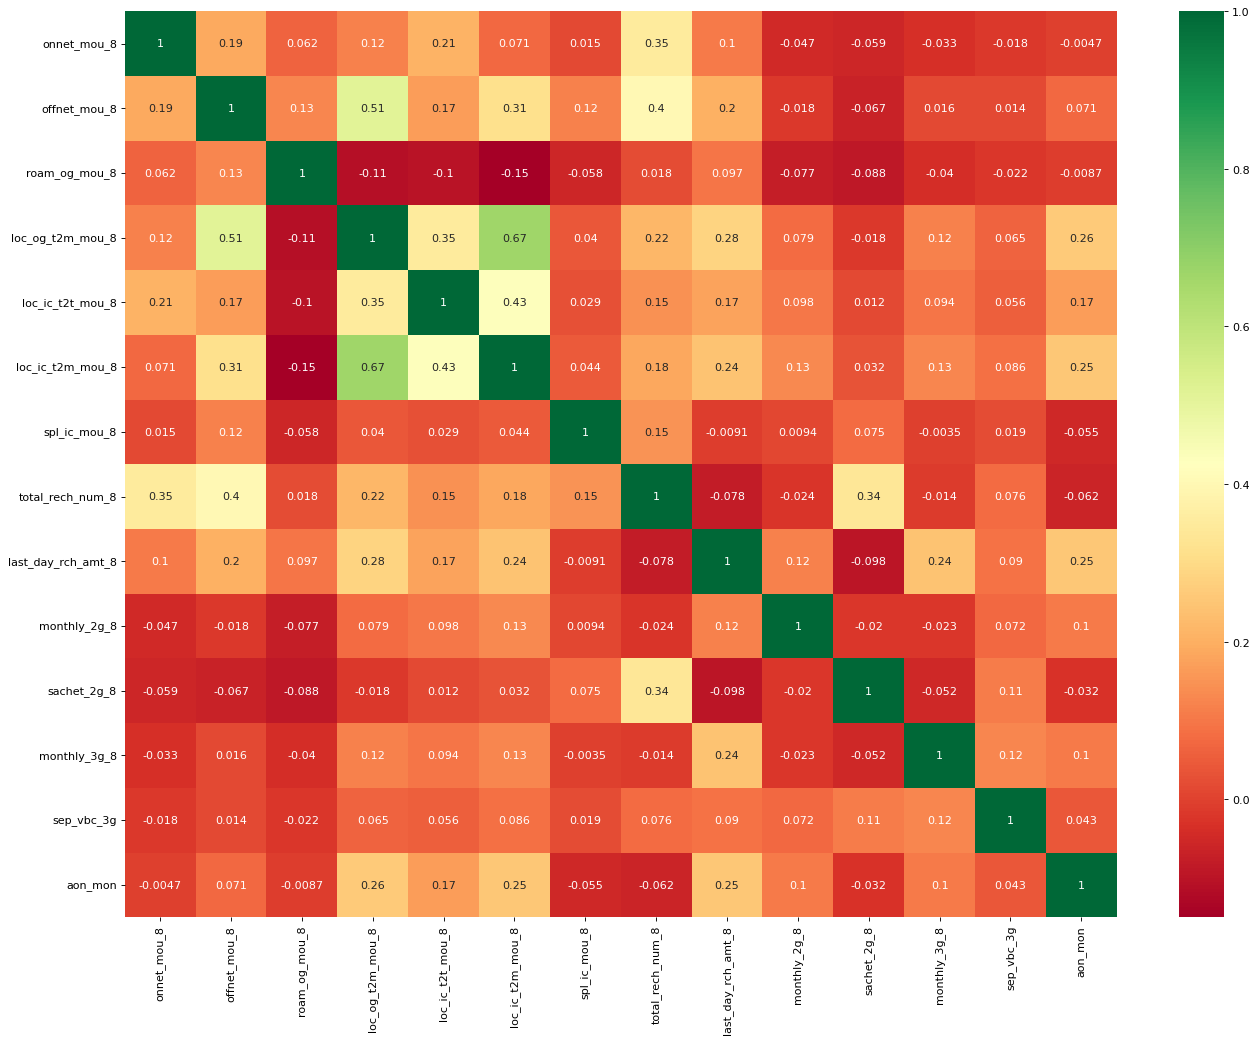

In [333]:
# Correlation matrix
plt.figure(figsize=(20,15), dpi=80)

sns.heatmap(X_train[log_cols].corr(), annot=True, cmap="RdYlGn")

plt.show()

In [334]:
print(log_cols)

['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g', 'aon_mon']


In [335]:
# Remove loc_ic_t2m_mou_8 column
log_cols.remove('loc_ic_t2m_mou_8')
print(log_cols)

['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g', 'aon_mon']


# Model 3

Building the model after removing loc_ic_t2m_mou_8 variable.

In [336]:
# Adding constant to X_train
X_train_sm_3 = sm1.add_constant(X_train[log_cols])

#Instantiate the model
logreg_no_pca_3 = sm1.GLM(y_train, X_train_sm_3, family=sm1.families.Binomial())

# Fit the model
logreg_no_pca_3 = logreg_no_pca_3.fit()

logreg_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37274
Model:                            GLM   Df Residuals:                    37260
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16055.
Date:                Sun, 04 Dec 2022   Deviance:                       32110.
Time:                        20:17:01   Pearson chi2:                 7.33e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3924      0.018    -21.696      0.000      -0.428      -0.357
onnet_mou_8           -0.1908      0.015    -12.702      0.000      -0.220      -0.161
offnet_mou_8          -0.0730      0.017     -4.286      0.000      -0.106      -0.040
roam_og_mou_8          0.5853      0.020     29.841      0.000       0.547       0.624
loc_og_t2m_mou_8      -0.5473      0.025    -22.259      0.000      -0.596      -0.499
loc_ic_t2t_mou_8      -0.5196      0.027    -19.344      0.000      -0.572      -0.467
spl_ic_mou_8          -0.3941      0.020    -19.964      0.000      -0.433      -0.355
total_rech_num_8      -0.3461      0.018    -18.917      0.000      -0.382      -0.310
last_day_rch_amt_8    -0.5061      0.018    -28.734      0.000      -0.541      -0.472
monthly_2g_8          -0.9051      0.028    -32.816      0.000      -0.959      -0.851
sachet_2g_8           -0.6583      0.020    -33.191      0.000      -0.697      -0.619
monthly_3g_8          -0.7288      0.025    -29.646      0.000      -0.777      -0.681
sep_vbc_3g            -0.7953      0.060    -13.225      0.000      -0.913      -0.677
aon_mon               -0.3629      0.016    -23.207      0.000      -0.394      -0.332
======================================================================================
"""

# Checking VIFs

In [337]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,1.73
6,total_rech_num_8,1.72
3,loc_og_t2m_mou_8,1.69
7,last_day_rch_amt_8,1.30
0,onnet_mou_8,1.26
9,sachet_2g_8,1.26
4,loc_ic_t2t_mou_8,1.22
12,aon_mon,1.15
2,roam_og_mou_8,1.11
10,monthly_3g_8,1.10


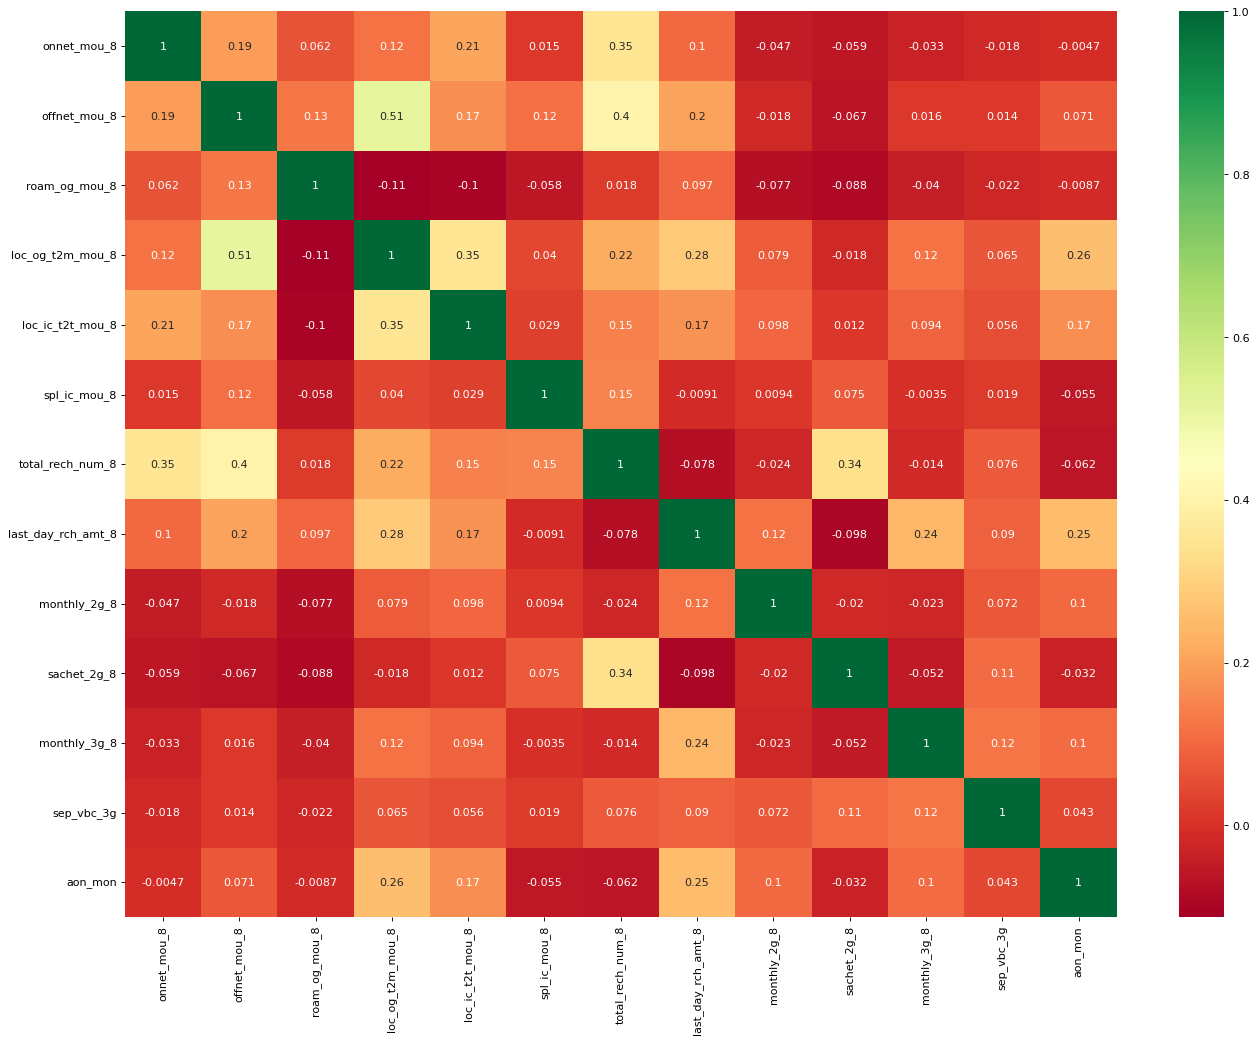

In [338]:
# Correlation matrix
plt.figure(figsize=(20,15), dpi=80)

sns.heatmap(X_train[log_cols].corr(), annot=True, cmap="RdYlGn")

plt.show()

Now from the model summary and the VIF list and correlation matrix we can see that all the variables are significant and there is no multicollinearity among the variables.

Hence, we can conclused that *Model 3 without PCA will be the final model*.

Model performance on the train set

In [339]:
# Getting the predicted value on the train set
y_train_pred_no_pca = logreg_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

0   0.09
1   0.29
2   0.34
3   0.02
4   0.08
dtype: float64

Creating a dataframe with the actual churn and the predicted probabilities

In [340]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.09,0
1,0,0.29,1
2,0,0.34,2
3,0,0.02,3
4,0,0.08,4


Finding Optimal Probablity Cutoff Point

In [341]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.09,0,1,0,0,0,0,0,0,0,0,0
1,0,0.29,1,1,1,1,0,0,0,0,0,0,0
2,0,0.34,2,1,1,1,1,0,0,0,0,0,0
3,0,0.02,3,1,0,0,0,0,0,0,0,0,0
4,0,0.08,4,1,0,0,0,0,0,0,0,0,0


Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [342]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.00         0.00      0.50         1.00         0.00
0.10         0.10      0.68         0.98         0.39
0.20         0.20      0.74         0.95         0.52
0.30         0.30      0.77         0.93         0.62
0.40         0.40      0.79         0.89         0.69
0.50         0.50      0.80         0.84         0.77
0.60         0.60      0.81         0.78         0.84
0.70         0.70      0.79         0.69         0.89
0.80         0.80      0.75         0.54         0.95
0.90         0.90      0.55         0.11         0.99


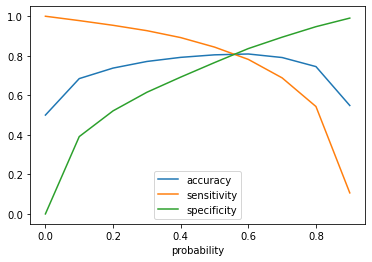

In [343]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

we should take 0.58 as the optimum probability cutoff, we are taking *0.5* for acheiving higher sensitivity, 
which is our main goal.

In [344]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.09,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.29,1,1,1,1,0,0,0,0,0,0,0,0
2,0,0.34,2,1,1,1,1,0,0,0,0,0,0,0
3,0,0.02,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.08,4,1,0,0,0,0,0,0,0,0,0,0


# Metrics

In [345]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[14267  4370]
 [ 2908 15729]]


In [346]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [347]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.804743252669421
Sensitivity:- 0.8439663035896335
Specificity:- 0.7655202017492085


Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [348]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

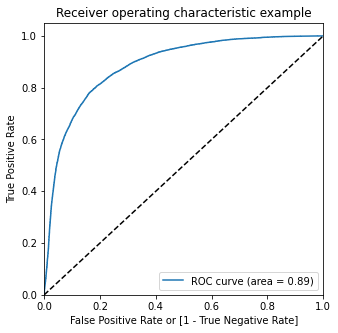

In [349]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, whic is the Gini of the model.

Testing the model on the test set

In [350]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [351]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [352]:
# Adding constant on the test set
X_test_sm = sm1.add_constant(X_test_log)

In [353]:
# Predict on the test set
y_test_pred = logreg_no_pca_3.predict(X_test_sm)
y_test_pred.head()

13249   0.17
63784   0.99
13106   0.64
49091   0.51
36619   0.02
dtype: float64

In [354]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
13249,0.17
63784,0.99
13106,0.64
49091,0.51
36619,0.02


In [355]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
13249,0
63784,1
13106,0
49091,0
36619,0


In [356]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [357]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [358]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)
y_test_pred_final.head()

,churn,CustID,0
0,0,13249,0.17
1,1,63784,0.99
2,0,13106,0.64
3,0,49091,0.51
4,0,36619,0.02


In [359]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [360]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [361]:
y_test_pred_final.head()

,churn,CustID,churn_prob,test_predicted
0,0,13249,0.17,0
1,1,63784,0.99,1
2,0,13106,0.64,1
3,0,49091,0.51,1
4,0,36619,0.02,0


# Metrics

In [362]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[6152 1836]
 [ 109  352]]


In [363]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [364]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7697952420404781
Sensitivity:- 0.7635574837310195
Specificity:- 0.7701552328492739


*Model summary*

Train set
* Accuracy:- 0.804743252669421
* Sensitivity:- 0.8439663035896335
* Specificity:- 0.7655202017492085

Test set
* Accuracy:- 0.7697952420404781
* Sensitivity:- 0.7635574837310195
* Specificity:- 0.7701552328492739
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

Overall logistic regression with no pca is a good model having(model 3) good sensitivity and accuracy.

# Determining Feature Importance in Logistic Regression Without PCA

In [365]:
pd.options.display.float_format = '{:.2f}'.format
new_params = logreg_no_pca_3.params[1:]
new_params

onnet_mou_8          -0.19
offnet_mou_8         -0.07
roam_og_mou_8         0.59
loc_og_t2m_mou_8     -0.55
loc_ic_t2t_mou_8     -0.52
spl_ic_mou_8         -0.39
total_rech_num_8     -0.35
last_day_rch_amt_8   -0.51
monthly_2g_8         -0.91
sachet_2g_8          -0.66
monthly_3g_8         -0.73
sep_vbc_3g           -0.80
aon_mon              -0.36
dtype: float64

Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

In [366]:
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

onnet_mou_8           -32.60
offnet_mou_8          -12.46
roam_og_mou_8         100.00
loc_og_t2m_mou_8      -93.52
loc_ic_t2t_mou_8      -88.78
spl_ic_mou_8          -67.33
total_rech_num_8      -59.13
last_day_rch_amt_8    -86.47
monthly_2g_8         -154.66
sachet_2g_8          -112.48
monthly_3g_8         -124.52
sep_vbc_3g           -135.89
aon_mon               -62.00
dtype: float64

In [367]:
# Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

onnet_mou_8            8
offnet_mou_8          11
roam_og_mou_8         10
loc_og_t2m_mou_8       9
loc_ic_t2t_mou_8       3
spl_ic_mou_8           4
total_rech_num_8       7
last_day_rch_amt_8     5
monthly_2g_8          12
sachet_2g_8            6
monthly_3g_8           0
sep_vbc_3g             1
aon_mon                2
dtype: int64

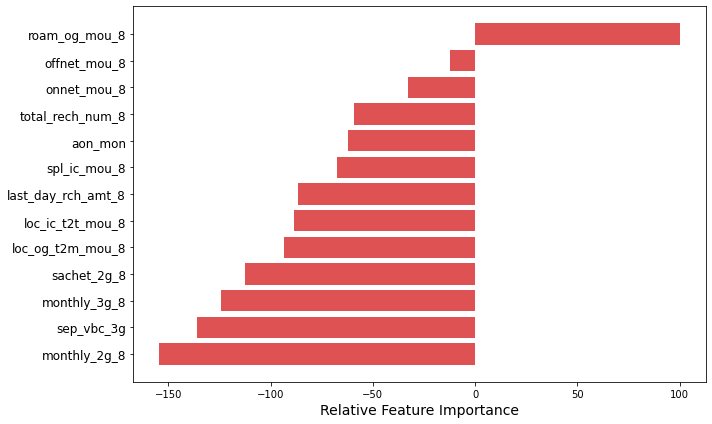

In [368]:
# Plot showing the feature variables based on their relative coefficient values
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[log_cols].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

We can see most of the top variables have negative coefficients. That means, 
the variables are inversely correlated with the churn probablity.

# Recommendations:
 - roam_og_mou_8: Higher the outgoing minutes of usage, higher is the churn rate in Aug (8th month). Focus on customers whose outgoing minutes of usage has increased in Aug (8th month), because they are likely to churn.
 
 - offnet_mou_8: Lower the all kinds of calls minutes of usage from outside operator network in Aug (8th month), higher the churn rate. Focus on customers whose kinds of calls minutes of usage from outside operator network in action phase (Aug) is less, because they are likely to churn. 
 
- offnet_mou_8: Lower the all kinds of calls minutes of usage from within operator network in Aug (8th month), higher the churn rate. Focus on customers whose kinds of calls minutes of usage from within operator network in action phase (Aug) is less, because they are likely to churn. 

- total_rech_num_8: Lower the total recharge count in Aug (8th month) in action phase, higher the churn rate. So concentate on this.

- aon_mon: Lower the age of network (number of days customer is using the network), higher the churn rate. So concentrate on having less age of network customers.

- spl_ic_mou_8: Lower the special calls minutes of usage in Aug (8th month), higher the churn rate. Focus on customers whose having special calls minutes of usage in action phase (Aug) is less, because they are more likely to churn.

- last_day_rech_amt_8: Lower the last day recharge amount in Aug(8th month), higher the churn rate. Focus on customers whose last day recharge amount in Aug month is less , because they are more likely to churn.

- loc_ic_t2t_mou_8: Lower the incoming local calls with in the same mobile network same telecom circle and network in the Aug (8th month), higher the churn rate.

- loc_og_t2m_mou_8: Lower the outgoing local calls with the other mobile network in the Aug (8th month), higher the churn rate.

- sachet_2g_8: Lower the usage of the service schemes with validity smaller than a month with 2g data in the Aug (8th month), higher the churn rate. 

- monthly_3g_8 and monthly_2g_8: Lower the usage of monthly validity 3g data and 2g data schemes in the Aug (8th month), higher the churn rate.

- sep_vbc_3g: Lower the volume based cost - when no specific scheme is not purchased and paid as per usage of 3g data, higher the churn rate. So concentate on these customers.
